In [1]:
!pip install polyglot PyICU pycld2 morfessor
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 126 kB 5.1 MB/s 
     |████████████████████████████████| 255 kB 49.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 41.4 MB 106 kB/s 
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52580 sha256=a947c3aed7e6ab71a7fbe375a330eb7401ccc54a63bc3551366a33a6c0837db8
  Stored in directory: /root/.cache/pip/wheels/09/bc/67/75c9de8e9726460bc0b101ad225ad025cb8ce9e0759beb9d52
  Created wheel for PyICU: filename=PyICU-2.10.2-cp37-cp37m-linux_x86_64.whl size=1379493 sha256=cca1aca17150d65e09330027ade6444c187561df3d216b7b3a883903e272ef8e
  Stored in directory: /root/.cache/pip/wheels/eb/9a/92/8aac41f3aecd15d913695d08f07687cf1d92067e3d38995968
  Created wheel for pycld2: filename=pycld2-0.41-cp37-cp37m-linux_x

In [1]:
import matplotlib.pyplot as plt, numpy as np, seaborn as sns, pandas as pd, re, nltk, itertools, spacy
nltk.download('punkt')
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tree import Tree
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from polyglot.text import Text, Word
from polyglot.downloader import downloader
downloader.download("embeddings2.es")
downloader.download("ner2.es")
downloader.download("embeddings2.fr")
downloader.download("ner2.fr")
from collections import Counter, defaultdict
from string import punctuation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
!python -m spacy download de_core_news_sm
!python -m spacy download en_core_web_md
!python -m spacy download en_core_web_lg
from spacy.lang.en import English
from spacy.matcher import PhraseMatcher, Matcher
from spacy.tokens import Doc, Span
from spacy.language import Language

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


[polyglot_data] Downloading package embeddings2.es to
[polyglot_data]     /root/polyglot_data...
[polyglot_data] Downloading package ner2.es to /root/polyglot_data...
[polyglot_data] Downloading package embeddings2.fr to
[polyglot_data]     /root/polyglot_data...
[polyglot_data] Downloading package ner2.fr to /root/polyglot_data...
2022-11-28 13:17:10.233960: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.6 MB 110 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
2022-11-28 13:17:23.383574: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels

# **The nlp object**

In [ ]:
# Import the English language class
from spacy.lang.en import English

# Create the nlp object
nlp = English()

# **The `doc` object**

In [6]:
# Created by processing a string of text with the nlp object
doc = nlp("Hello world!")

# Iterate over tokens in a Doc
for token in doc:
    print(token.text)

Hello
world
!


# **The `token` object**

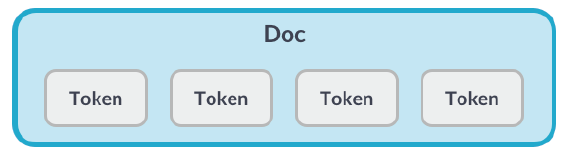



In [11]:
doc = nlp("Hello world!")
# Index into the Doc to get a single Token
token = doc[0]
# Get the token text via the .text attribute
print(token.text, type(token.text))
print(token, type(token))

Hello <class 'str'>
Hello <class 'spacy.tokens.token.Token'>


# **The `span` object**



> 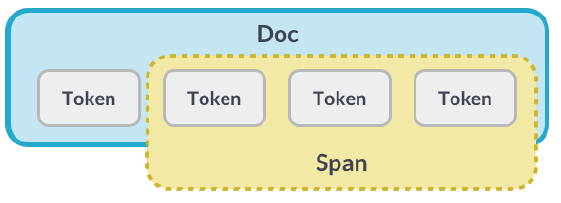



In [12]:
doc = nlp("Hello world!")

# A slice from the Doc is a Span object
span = doc[1:4]

# Get the span text via the .text attribute
print(span.text)

world!


# **Lexical attributes**

In [13]:
doc = nlp("It costs $5.")

print('Index: ', [token.i for token in doc])
print('Text: ', [token.text for token in doc])
print('is_alpha:', [token.is_alpha for token in doc])
print('is_punct:', [token.is_punct for token in doc])
print('like_num:', [token.like_num for token in doc])

Index:  [0, 1, 2, 3, 4]
Text:  ['It', 'costs', '$', '5', '.']
is_alpha: [True, True, False, False, False]
is_punct: [False, False, False, False, True]
like_num: [False, False, False, True, False]


## ***Getting Started***

Let's get started and try out spaCy! In this exercise, you'll be able to try out some of the 45+ [available languages](https://spacy.io/usage/models#languages).

This course introduces a lot of new concepts, so if you ever need a quick refresher, download the [spaCy Cheat Sheet](http://datacamp-community-prod.s3.amazonaws.com/29aa28bf-570a-4965-8f54-d6a541ae4e06) and keep it handy!

* Import the `English` class from **`spacy.lang.en`** and create the `nlp` object.

* Create a `doc` and print its text.

In [ ]:
# Import the English language class
from spacy.lang.en import English

# Create the nlp object
nlp = English()

# Process a text
doc = nlp("This is a sentence.")

# Print the document text
print(doc.text)

This is a sentence.


* Import the `German` class from **`spacy.lang.de`** and create the `nlp` object.
* Create a `doc` and print its text.

In [ ]:
# Import the German language class
from spacy.lang.de import German

# Create the nlp object
nlp = German()

# Process a text (this is German for: "Kind regards!")
doc = nlp("Liebe Grüße!")

# Print the document text
print(doc.text)

Liebe Grüße!


* Import the `Spanish` class from **`spacy.lang.es`** and create the `nlp` object.
* Create a `doc` and print its text.

In [ ]:
# Import the Spanish language class
from spacy.lang.es import Spanish

# Create the nlp object
nlp = Spanish()

# Process a text (this is Spanish for: "How are you?")
doc = nlp("¿Cómo estás?")

# Print the document text
print(doc.text)

¿Cómo estás?


## ***Documents, spans and tokens***

When you call `nlp` on a string, spaCy first tokenizes the text and creates a document object. In this exercise, you'll learn more about the `Doc`, as well as its views `Token` and `Span`.


* Import the `English` language class and create the `nlp` object.
* Process the text and instantiate a `Doc` object in the variable `doc`.
* Select the first token of the `Doc` and print its `text`.

In [ ]:
from spacy.lang.en import English
nlp = English()

# Process the text
doc = nlp("I like tree kangaroos and narwhals.")

# Select the first token
first_token = doc[0]

# Print the first token's text
print(first_token.text)

I


* Create a slice of the `Doc` for the tokens "tree kangaroos" and "tree kangaroos and narwhals".

In [ ]:
# Import the English language class and create the nlp object
from spacy.lang.en import English
nlp = English()

# Process the text
doc = nlp("I like tree kangaroos and narwhals.")

# A slice of the Doc for "tree kangaroos"
tree_kangaroos = doc[2:4]
print(tree_kangaroos.text)

# A slice of the Doc for "tree kangaroos and narwhals" (without the ".")
tree_kangaroos_and_narwhals = doc[2:-1]
print(tree_kangaroos_and_narwhals.text)

tree kangaroos
tree kangaroos and narwhals


## ***Lexical attributes***

In this example, you'll use spaCy's `Doc` and `Token` objects, and lexical attributes to find percentages in a text. You'll be looking for two subsequent tokens: a number and a percent sign. The English `nlp` object has already been created.

* Use the **`like_num`** token attribute to check whether a token in the doc resembles a number.
- Get the token *following* the current token in the document. The index of the next token in the `doc` is `token.i + 1`.
- Check whether the next token's `text` attribute is a percent sign "%".

In [ ]:
# Process the text
doc = nlp("In 1990, more than 60% of people in East Asia were in extreme poverty. Now less than 4% are.")

# Iterate over the tokens in the doc
for token in doc:
    # Check if the token resembles a number
    if token.like_num:
        # Get the next token in the document
        next_token = doc[token.i+1]
        # Check if the next token's text equals '%'
        if next_token.text == '%':
            print('Percentage found:', token.text)

Percentage found: 60
Percentage found: 4


# **Predicting Part-of-speech Tags: `.pos_`**

In [ ]:
import spacy

# Load the small English model
nlp = spacy.load('en_core_web_sm')

# Process a text
doc = nlp("She ate the pizza")

# Iterate over the tokens
for token in doc:
    # Print the text and the predicted part-of-speech tag
    print(token.text, token.pos_)

She PRON
ate VERB
the DET
pizza NOUN


# **Predicting Syntactic Dependencies**



> i.e., whether the words are subjects or objects

- **`.dep_`** returns the predicted dependency labels
- **`.head`** returns the syntactic head token



> 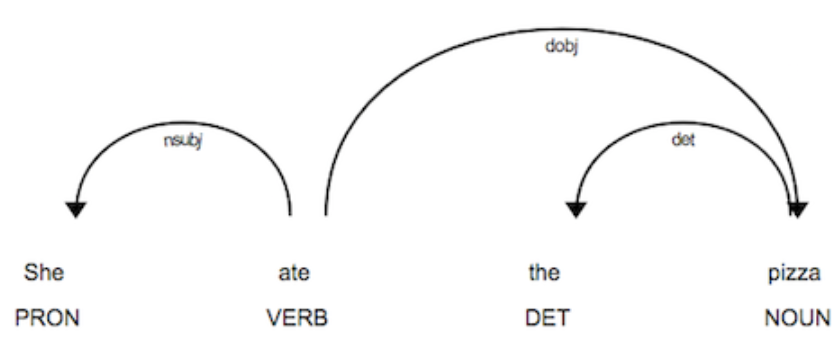




In [16]:
doc = nlp("She ate the pizza")
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

She PRON nsubj ate
ate VERB ROOT ate
the DET det pizza
pizza NOUN dobj ate


# **Predicting Named Entities**

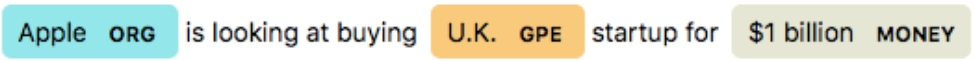

- **`doc.ents`** lets you access the *named entities* predicted by the model

In [23]:
# Process a text
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

Apple ORG
U.K. GPE
$1 billion MONEY


# **Tip: the `.explain` method**

In [5]:
spacy.explain('GPE')

'Countries, cities, states'

In [24]:
spacy.explain('NNP')

'noun, proper singular'

In [25]:
spacy.explain('dobj')

'direct object'

## ***Loading models***

Let's start by loading a model. `spacy` is already imported.

1. 
- Use `spacy.load` to load the small English model `'en_core_web_sm'`.
- Process the text and print the document text.

2. 
- Use `spacy.load` to load the small German model `'de_core_news_sm'`.
- Process the text and print the document text.

In [ ]:
# Load the 'en_core_web_sm' model – spaCy is already imported
nlp = spacy.load('en_core_web_sm')

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

# Print the document text
print(doc.text)

# Load the 'de_core_news_sm' model – spaCy is already imported
nlp = spacy.load('de_core_news_sm')

text = "Als erstes Unternehmen der Börsengeschichte hat Apple einen Marktwert von einer Billion US-Dollar erreicht"

# Process the text
doc = nlp(text)

# Print the document text
print(doc.text)

It’s official: Apple is the first U.S. public company to reach a $1 trillion market value
Als erstes Unternehmen der Börsengeschichte hat Apple einen Marktwert von einer Billion US-Dollar erreicht


## ***Predicting linguistic annotations***

You'll now get to try one of spaCy's pre-trained model packages and see its predictions in action. Feel free to try it out on your own text! The small English model is already available as the variable `nlp`.

To find out what a tag or label means, you can call `spacy.explain` in the IPython shell. For example: `spacy.explain('PROPN')` or `spacy.explain('GPE')`.

* Process the text with the `nlp` object and create a `doc`.
* For each token, print the token text, the token's `.pos_` (part-of-speech tag) and the token's `.dep_` (dependency label).

In [ ]:
nlp = spacy.load('en_core_web_sm')

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print('{:<12}{:<10}{:<10}'.format(token_text, token_pos, token_dep))

It          PRON      nsubj     
’s          VERB      ROOT      
official    ADJ       acomp     
:           PUNCT     punct     
Apple       PROPN     nsubj     
is          AUX       ROOT      
the         DET       det       
first       ADJ       amod      
U.S.        PROPN     nmod      
public      ADJ       amod      
company     NOUN      attr      
to          PART      aux       
reach       VERB      relcl     
a           DET       det       
$           SYM       quantmod  
1           NUM       compound  
trillion    NUM       nummod    
market      NOUN      compound  
value       NOUN      dobj      


- Process the text and create a `doc` object.
- Iterate over the `doc.ents` and print the entity text and `label_` attribute.

In [ ]:
text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

# Iterate over the predicted entities
for ent in doc.ents:
    # print the entity text and its label
    print(ent.text, ent.label_)

Apple ORG
first ORDINAL
U.S. GPE
$1 trillion MONEY


So far, the model has been correct every single time. In the next exercise, you'll see what happens if the model is wrong, and how to adjust it.

## ***Predicting named entities in context***

Models are statistical and not always right. Whether their predictions are correct depends on the training data and the text you're processing. Let's take a look at an example. The small English model is available as the variable `nlp`.

- Process the text with the `nlp` object.
- Iterate over the entities with the iterator `ent` and print the entity text and label.

In [ ]:
text = "New iPhone X release date leaked as Apple reveals pre-orders by mistake"

# Process the text
doc = nlp(text)

# Iterate over the entities
for ent in doc.ents:
    # print the entity text and label
    print(ent.text, ent.label_)

Apple ORG


- Looks like the model didn't predict "iPhone X". Create a span for those tokens manually.

In [ ]:
text = "New iPhone X release date leaked as Apple reveals pre-orders by mistake"

# Process the text
doc = nlp(text)

# Iterate over the entities
for ent in doc.ents:
    # print the entity text and label
    print(ent.text, ent.label_)

# Get the span for "iPhone X"
iphone_x =doc[1:3]

# Print the span text
print('Missing entity:', iphone_x.text)

Apple ORG
Missing entity: iPhone X


Of course, you don't always have to do this manually. In the next video, you'll learn about spaCy's rule-based matcher, which can help you find certain words and phrases in text.

# **Rule-based matching**

- Match patterns are *lists of dictionaries*, one per token.
- The key are the names of token attributes, mapped to their expected values
   - Match exact token texts


In [ ]:
Match exact token texts
[{'ORTH': 'iPhone'}, {'ORTH': 'X'}]

   - Match lexical attributes

In [ ]:
[{'LOWER': 'iphone'}, {'LOWER': 'x'}]

- Match any token attributes
   - LEMMA ก็คือ base form เช่นถ้าเป็นกิริยาก็จะเป็น inifinitive with to

In [ ]:
[{'LEMMA': 'buy'}, {'POS': 'NOUN'}]

# **Using the Matcher (1)**

- **`match_id`** : hash value of the pattern name
- **`start`** : start index of *matched* span
- **`end`** : end index of *matched* span

In [31]:
import spacy
from spacy.matcher import Matcher

# Load a model and create the nlp object
nlp = spacy.load('en_core_web_sm')

# Initialize the matcher with the shared vocab
matcher = Matcher(nlp.vocab)

# Add the pattern to the matcher
pattern = [{'ORTH': 'iPhone'}, {'ORTH': 'X'}]
matcher.add('IPHONE_PATTERN', [pattern]) # สำหรับเวอร์ชั่น 3 ต้องเขียน [pattern]

# Process some text
doc = nlp("New iPhone X release date leaked")

# Call the matcher on the doc
matches = matcher(doc)

# Iterate over the matches
for match_id, start, end in matches:
# Get the matched span
    print(match_id, start, end)
    matched_span = doc[start:end]
    print(matched_span.text)

9528407286733565721 1 3
iPhone X


# **Matching lexical attributes**

In [34]:
pattern = [{'IS_DIGIT': True},
           {'LOWER': 'fifa'},
           {'LOWER': 'world'},
           {'LOWER': 'cup'},
           {'IS_PUNCT': True}]

matcher = Matcher(nlp.vocab)
matcher.add('pattern', [pattern])
doc = nlp("2018 FIFA World Cup: France won!")
matches = matcher(doc)
for match_id, start, end in matches:
    print(match_id, start, end)
    matched_span = doc[start:end]
    print(matched_span.text)

15329811787164753587 0 5
2018 FIFA World Cup:


# **Matching other token attributes**

In [36]:
pattern = [{'LEMMA': 'love', 'POS': 'VERB'},{'POS': 'NOUN'}]
matcher = Matcher(nlp.vocab)
matcher.add('pattern', [pattern])

doc = nlp("I loved dogs but now I love cats more.")
matches = matcher(doc)
for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span.text)

loved dogs
love cats


# **Using operators and quantifiers**




- **`{'OP': '!'}`** Negation: match 0 times
- **`{'OP': '?'}`** Optional: match 0 or 1 times
- **`{'OP': '+'}`** Match 1 or more times
- **`{'OP': '*'}`** Match 0 or more times




In [37]:
pattern = [{'LEMMA': 'buy'}, {'POS': 'DET', 'OP': '?'}, # optional: match 0 or 1 times
           {'POS': 'NOUN'}]
matcher = Matcher(nlp.vocab)
matcher.add('pattern', [pattern])

doc = nlp("I bought a smartphone. Now I'm buying apps.")
matches = matcher(doc)
for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span.text)

bought a smartphone
buying apps





## ***Using the Matcher***

Let's try spaCy's rule-based `Matcher`. You'll be using the example from the previous exercise and write a pattern that can match the phrase "iPhone X" in the text. The `nlp` object and a processed `doc` are already available.

* Import the `Matcher` from `spacy.matcher`.
* Initialize it with the `nlp` object's shared vocab.
* Create a pattern that matches the `'TEXT'` values of two tokens: `"iPhone"` and `"X"`.
* Use the **`matcher.add`** method to add the pattern to the matcher.

- Call the matcher on the `doc` and store the result in the variable `matches`.
- Iterate over the matches and get the matched span from the `start` to the `end` index.

In [ ]:
nlp = spacy.load('en_core_web_sm')
doc = nlp('New iPhone X release date leaked as Apple reveals pre-orders by mistake')

# Import the Matcher and initialize it with the shared vocabulary
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

# Create a pattern matching two tokens: "iPhone" and "X"
pattern = [{'TEXT': 'iPhone'}, {'TEXT': 'X'}]

# Add the pattern to the matcher
matcher.add('IPHONE_X_PATTERN',  [pattern])

# Use the matcher on the doc
matches = matcher(doc)
print('Matches:', [doc[start:end].text for match_id, start, end in matches])

Matches: ['iPhone X']


You successfully found one match: the tokens at `doc[1:3] `describing the span for` "iPhone X"`.

## ***Writing match patterns***

In this exercise, you'll practice writing more complex match patterns using different token attributes and operators. A `matcher` is already initialized and available as the variable `matcher`.


1. Write **one** pattern that only matches mentions of the *full* iOS versions: "iOS 7", "iOS 11" and "iOS 10".



In [ ]:
doc = nlp("After making the iOS update you won't notice a radical system-wide redesign: nothing like the aesthetic upheaval we got with iOS 7. Most of iOS 11's furniture remains the same as in iOS 10. But you will discover some tweaks once you delve a little deeper.")

# Write a pattern for full iOS versions ("iOS 7", "iOS 11", "iOS 10")
pattern = [{'TEXT': 'iOS'}, {'IS_DIGIT': True}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add('IOS_VERSION_PATTERN', [pattern])
matches = matcher(doc)
print('Total matches found:', len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print('Match found:', doc[start:end].text)

Total matches found: 3
Match found: iOS 7
Match found: iOS 11
Match found: iOS 10


2. Write **one** pattern that only matches forms of `"download"` (tokens with the lemma `"download"`), followed by a token with the part-of-speech tag `'PROPN'` (proper noun).



In [ ]:
doc = nlp("i downloaded Fortnite on my laptop and can't open the game at all. Help? so when I was downloading Minecraft, I got the Windows version where it is the '.zip' folder and I used the default program to unpack it... do I also need to download Winzip?")

# Write a pattern that matches a form of "download" plus proper noun
pattern = [{'LEMMA': 'download'}, {'POS': 'PROPN'}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add('DOWNLOAD_THINGS_PATTERN', [pattern])
matches = matcher(doc)
print('Total matches found:', len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print('Match found:', doc[start:end].text)

Total matches found: 3
Match found: downloaded Fortnite
Match found: downloading Minecraft
Match found: download Winzip


3. Write **one** pattern that matches adjectives (`'ADJ'`) followed by one or two `'NOUN'`s (one noun and one optional noun).

In [ ]:
doc = nlp("Features of the app include a beautiful design, smart search, automatic labels and optional voice responses.")

# Write a pattern for adjective plus one or two nouns
pattern = [{'POS': 'ADJ'}, {'POS': 'NOUN'}, {'POS': 'NOUN', 'OP': '*'}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add('ADJ_NOUN_PATTERN', [pattern])
matches = matcher(doc)
print('Total matches found:', len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print('Match found:', doc[start:end].text)

Total matches found: 5
Match found: beautiful design
Match found: smart search
Match found: automatic labels
Match found: optional voice
Match found: optional voice responses


# **Data Structures (1)**

## **Shared vocab and string store (1)**

In [8]:
nlp = spacy.load('en_core_web_sm')

nlp.vocab.strings['coffee']

3197928453018144401

In [9]:
nlp.vocab.strings[3197928453018144401]

'coffee'

ถ้าไม่มีคำๆนั้นใน vocab ก็จะไม่มี hash id

# **Lexemes: entries in the vocabulary**
- A **`Lexeme`** object is an entry in the vocabulary
- ไม่มี context dependent part-of-speech tags, dependencies, หรือ entity labels

In [11]:
lexeme = nlp.vocab['coffee']
print(lexeme.text, lexeme.orth, lexeme.is_alpha)

coffee 3197928453018144401 True


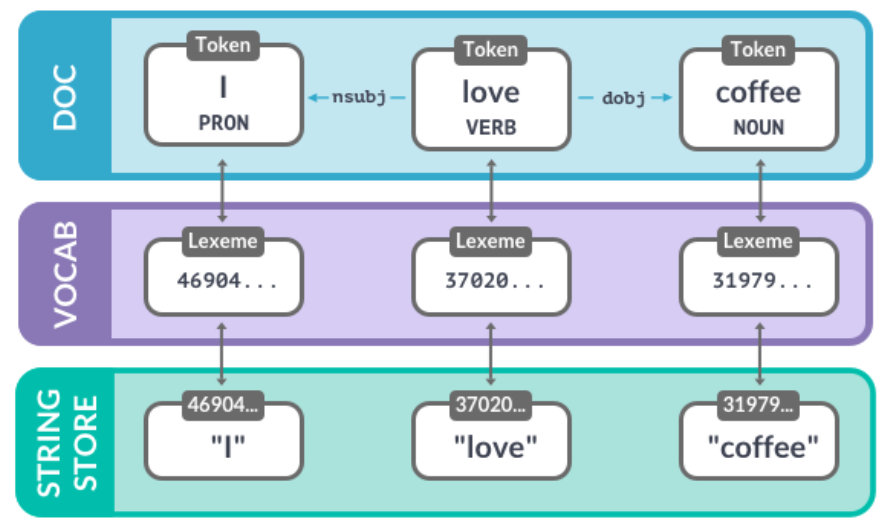



## ***Strings to hashes***
The `nlp` object has already been created.

1. 
- Look up the string `"cat"` in `nlp.vocab.strings` to get the hash.
* Look up the hash to get back the string.

2. 
- Look up the string label `"PERSON"` in `nlp.vocab.strings` to get the hash.
- Look up the hash to get back the string.

In [ ]:
# Look up the hash for the word "cat"
cat_hash = nlp.vocab.strings['cat']
print(cat_hash)
  
# Look up the cat_hash to get the string
cat_string = nlp.vocab.strings[cat_hash]
print(cat_string)

# Look up the hash for the string label "PERSON"
person_hash = nlp.vocab.strings['PERSON']
print(person_hash)

# Look up the person_hash to get the string
person_string = nlp.vocab.strings[person_hash]
print(person_string)

5439657043933447811
cat
380
PERSON


# **The `Doc` object**

- ถูกสร้างขึ้นมาอยู่แล้วเวลาสร้าง `nlp('text')`
- ด้านล่างนี้เป็นวิธีสร้างแบบ manual

In [14]:
from spacy.lang.en import English
from spacy.tokens import Doc

nlp = English()

# The words and spaces to create the doc from
words = ['Hello', 'world', '!']
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)
doc

Hello world!

# **The Span object**

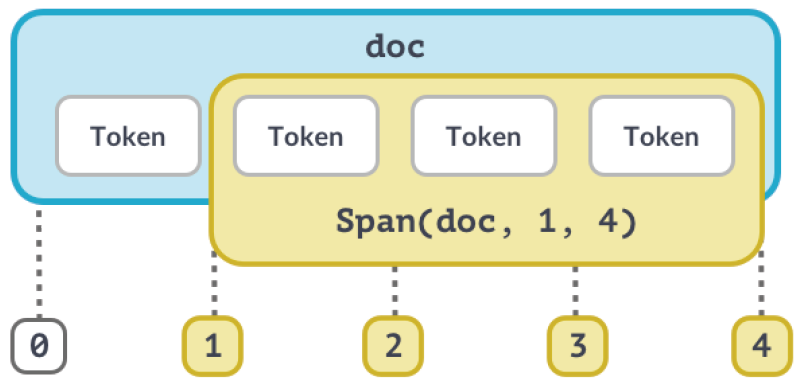

In [18]:
from spacy.tokens import Doc, Span

# The words and spaces to create the doc from
words = ['Hello', 'world', '!']
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)

# Create a span manually
span = Span(doc, 0, 2)
print(span)

# Create a span with a label
span_with_label = Span(doc, 0, 2, label="GREETING") # label's name ใช้ตัวพิมพ์ใหญ่
print(span_with_label)

# Add span to the doc.ents
doc.ents = [span_with_label]

for i in doc.ents:
    print(i.text, i.label_)

Hello world
Hello world
Hello world GREETING


# **Best practices**

- **`Doc`** and **`Span`** are very powerful and hold references and relationships of words and sentences

  - **Convert result to strings as late as possible**
  - Use token attributes if available – for example, **`token.i`** for the token index

- Don't forget to pass in the shared `vocab`

## ***Creating a `Doc`***

Let's create some `Doc` objects from scratch! The `nlp` object has already been created for you.



In [ ]:
# Import the Doc class
from spacy.tokens import Doc
from spacy.lang.en import English

nlp = English()

# Desired text: "spaCy is cool!"
words = ['spaCy', 'is', 'cool', '!']
spaces = [True, True, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

# Desired text: "Go, get started!"
words = ['Go', ',', 'get', 'started', '!']
spaces = [False, True, True, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

# Desired text: "Oh, really?!"
words = ['Oh', ',', 'really', '?', '!']
spaces = [False, True, False, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

spaCy is cool!
Go, get started!
Oh, really?!


## ***Docs, spans and entities from scratch***

In this exercise, you'll create the Doc and Span objects manually, and update the named entities – just like spaCy does behind the scenes. A shared `nlp` object has already been created.

* Import the `Doc` and `Span` classes from `spacy.tokens`.
* Use the `Doc` class directly to create a `doc` from the words and spaces.
- Create a `Span` for `"David Bowie"` from the `doc` and assign it the label `"PERSON"`.
- Overwrite the `doc.ents` with a list of one entity, the "David Bowie" `span`.

In [ ]:
# Import the Doc and Span classes
from spacy.tokens import Doc, Span

# Create a doc from the words and spaces
doc = Doc(nlp.vocab, words=['I', 'like', 'David', 'Bowie'], spaces=[True, True, True, False])

# Create a span for "David Bowie" from the doc and assign it the label "PERSON"
span = Span(doc, 2, 4, label='PERSON')

# Add the span to the doc's entities
doc.ents = [span]

# Print entities' text and labels
print([(ent.text, ent.label_) for ent in doc.ents])

[('David Bowie', 'PERSON')]


Creating spaCy's objects manually and modifying the entities will come in handy later when you're writing your own information extraction pipelines.

## ***Data structures best practices***
The code in this example is trying to analyze a text and collect all proper nouns. If the token following the proper noun is a verb, it should also be extracted. A doc object has already been created.



In [24]:
# Get all tokens and part-of-speech tags
nlp = spacy.load('en_core_web_sm')
doc = nlp('Berlin is a nice city')
pos_tags = [token.pos_ for token in doc]
print(pos_tags)

for index, pos in enumerate(pos_tags):
    # Check if the current token is a proper noun
    if pos == 'PROPN':
        # Check if the next token is a verb
        if pos_tags[index + 1] == 'AUX':
            print('Found a verb after a proper noun!')

['PROPN', 'AUX', 'DET', 'ADJ', 'NOUN']
Found a verb after a proper noun!


Question

Why is the code bad?

- It only uses lists of strings instead of native token attributes. This is often less efficient, and can't express complex relationships.

- Rewrite the code to use the native token attributes instead of a list of `pos_tags`.
- Loop over each `token` in the `doc` and check the **`token.pos_`** attribute.
- Use `doc[token.i + 1]` to check for the next token and its `.pos_` attribute.

In [ ]:
nlp = spacy.load('en_core_web_sm')
doc = nlp('Berlin is a nice city')
for token in doc:
    # Print the text and the predicted part-of-speech tag
    print(token.text, token.pos_)


for token in doc:
    # Check if the current token is a proper noun
    if token.pos_ == 'PROPN':
        # Check if the next token is a verb
        if doc[token.i + 1].pos_ == 'AUX':
            print('Found a verb after a proper noun!')

Berlin PROPN
is AUX
a DET
nice ADJ
city NOUN
Found a verb after a proper noun!


# **Word vectors and similarity**

## **Comparing semantic similarity**

- **`spaCy`** can compare two objects and predict similarity
  - **`Doc.similarity()`** , 
  - **`Span.similarity()`** and 
  - **`Token.similarity()`**

- Take another object and return a similarity score ( `0` to `1` )
- **Important**: needs a model that has word vectors included, for example:
  - **YES**: `en_core_web_md` (medium model)
  - **YES**: `en_core_web_lg` (large model)
  - **NO**: `en_core_web_sm` (small model)

## **Similarity examples**

In [ ]:
# Load a larger model with vectors
nlp = spacy.load('en_core_web_md')

# Compare two documents
doc1 = nlp("I like fast food")
doc2 = nlp("I like pizza")

print(doc1.similarity(doc2))

0.8698332283318978


In [ ]:
# Compare two tokens

doc = nlp("I like pizza and pasta")
token1 = doc[2]
token2 = doc[4]
print(token1.similarity(token2))

0.685019850730896


In [ ]:
# Compare a document with a token

doc = nlp("I like pizza")
token = nlp("soap")[0]
print(doc.similarity(token))

0.1821369691957915


In [ ]:
# Compare a span with a document

span = nlp("I like pizza and pasta")[2:5]
doc = nlp("McDonalds sells burgers")
print(span.similarity(doc))

0.47190033157126826


# **How does spaCy predict similarity? ==> Word vectors**

- Useful for many applications: recommendation systems, flagging duplicates etc.
- There's no objective definition of "similarity", e.g., what is similar and what is not.
- Depends on the context and what application needs to do

In [2]:
# Load a larger model with vectors
nlp = spacy.load('en_core_web_md')
doc = nlp("I have a banana")

# Access the vector via the token.vector attribute
print(doc[3].vector)

[ 0.20778  -2.4151    0.36605   2.0139   -0.23752  -3.1952   -0.2952
  1.2272   -3.4129   -0.54969   0.32634  -1.0813    0.55626   1.5195
  0.97797  -3.1816   -0.37207  -0.86093   2.1509   -4.0845    0.035405
  3.5702   -0.79413  -1.7025   -1.6371   -3.198    -1.9387    0.91166
  0.85409   1.8039   -1.103    -2.5274    1.6365   -0.82082   1.0278
 -1.705     1.5511   -0.95633  -1.4702   -1.865    -0.19324  -0.49123
  2.2361    2.2119    3.6654    1.7943   -0.20601   1.5483   -1.3964
 -0.50819   2.1288   -2.332     1.3539   -2.1917    1.8923    0.28472
  0.54285   1.2309    0.26027   1.9542    1.1739   -0.40348   3.2028
  0.75381  -2.7179   -1.3587   -1.1965   -2.0923    2.2855   -0.3058
 -0.63174   0.70083   0.16899   1.2325    0.97006  -0.23356  -2.094
 -1.737     3.6075   -1.511    -0.9135    0.53878   0.49268   0.44751
  0.6315    1.4963    4.1725    2.1961   -1.2409    0.4214    2.9678
  1.841     3.0133   -4.4652    0.96521  -0.29787   4.3386   -1.2527
 -1.7734   -3.5637   -0.20035

อันด้านล่างนี้ จะมองว่าเหมือน เพราะพูดถึงแมว หรือจะมองว่าต่างไปเลยก็ได้

In [3]:
doc1 = nlp("I like cats")
doc2 = nlp("I hate cats")
print(doc1.similarity(doc2))

0.9530094042245597


## ***Inspecting word vectors***

In this exercise, you'll use a larger English model, which includes around 20,000 word vectors. Because vectors take a little longer to load, we're using a slightly compressed version of it than the one you can download with spaCy. The model is already pre-installed, and `spacy` has already been imported for you.

* Load the medium `'en_core_web_md'` model with word vectors.
* Print the vector for `"bananas"` using the `token.vector` attribute.

In [ ]:
# Load the en_core_web_md model
nlp = spacy.load('en_core_web_md')

# Process a text
doc = nlp("Two bananas in pyjamas")

# Get the vector for the token "bananas"
bananas_vector = doc[1].vector
print(bananas_vector)

[-2.1689e-01 -2.5989e+00 -1.3144e+00  2.2500e+00 -4.6767e-01 -2.0695e+00
 -6.3379e-01 -4.0222e-01 -3.4022e+00 -3.6932e-01 -7.9938e-01 -1.0412e+00
  9.3756e-01  1.6070e+00  8.8330e-01 -2.8483e+00  1.3349e-01 -3.1656e+00
  8.1896e-01 -4.8113e+00  1.5655e+00  1.6665e+00 -4.7081e-01 -1.9475e+00
 -1.1779e+00 -1.3810e+00 -2.0071e+00 -2.1639e-01  9.0609e-01  1.5279e+00
  1.2587e-04 -2.9000e+00  7.6069e-01 -2.2825e+00  1.2495e-02 -1.5653e+00
  2.0052e+00 -1.7747e+00  5.9220e-01 -1.1428e+00 -1.3441e+00  3.4784e-01
  1.7492e+00  1.9086e+00  1.0600e+00  1.2965e+00  4.1431e-01  7.9416e-01
 -1.1277e+00 -1.1403e+00  7.5891e-01 -9.4419e-01  1.4413e+00 -2.2554e+00
  1.6226e-01  3.8901e-01  1.2299e-01  1.1577e+00  1.5524e+00  1.3853e+00
  1.1112e+00  7.5767e-01  3.9431e+00 -2.8506e-01 -2.1645e+00 -1.0862e+00
 -1.4973e+00 -1.2781e+00  2.4643e+00 -1.5886e+00  2.5679e-01  6.4918e-01
  1.6809e-01  5.7693e-01  3.1121e-01 -4.5278e-01 -2.7555e+00 -2.1846e+00
  4.4865e+00  2.7107e-01 -5.3831e-01  8.3013e-01  6

## ***Comparing similarities***

Use spaCy's **`similarity`** methods to compare `Doc`, `Token` and `Span` objects and get similarity scores. The medium English model is already available as the `nlp` object.


- Use the **`doc.similarity`** method to compare `doc1` to `doc2` and print the result.

- Use the **`token.similarity`** method to compare `token1` to `token2` and print the result.

- Create spans for `"great restaurant"/"really nice bar"`.
- Use **`span.similarity`** to compare them and print the result.

In [ ]:
doc1 = nlp("It's a warm summer day")
doc2 = nlp("It's sunny outside")

# Get the similarity of doc1 and doc2
similarity = doc1.similarity(doc2)
print(similarity)

doc = nlp("TV and books")
token1, token2 = doc[0], doc[2]

# Get the similarity of the tokens "TV" and "books" 
similarity = token1.similarity(token2)
print(similarity)

doc = nlp("This was a great restaurant. Afterwards, we went to a really nice bar.")

# Create spans for "great restaurant" and "really nice bar"
span1 = doc[3:5]
span2 = doc[-4:-1]

# Get the similarity of the spans
similarity = span1.similarity(span2)
print(similarity)

0.8220092482601077
0.10219937562942505
0.6348510384559631


The similarities are not *always* this conclusive. Once you're getting serious about developing NLP applications that leverage semantic similarity, you might want to train vectors on your own data, or tweak the similarity algorithm.

# **Statistical predictions vs. rules**

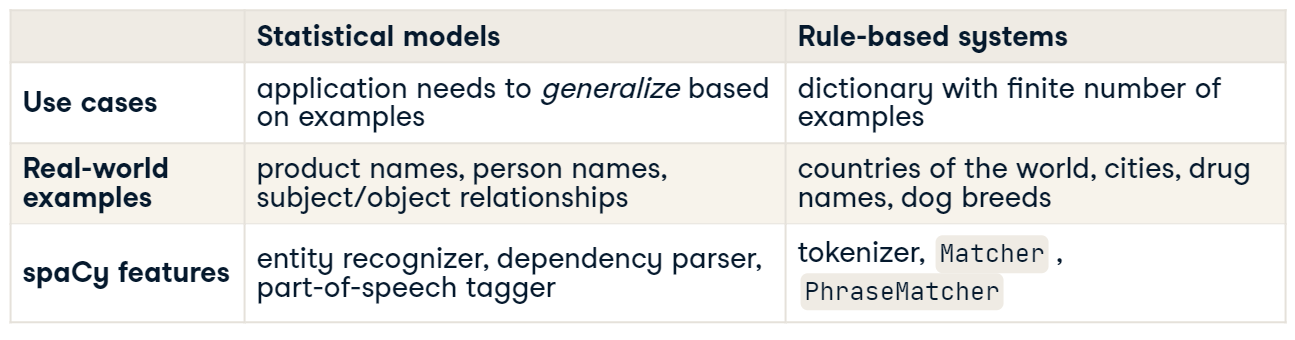

# **Recap: Rule-based Matching**

In [ ]:
# Initialize with the shared vocab
from spacy.matcher import Matcher

matcher = Matcher(nlp.vocab)

# Patterns are lists of dictionaries describing the tokens
pattern = [{'LEMMA': 'love', 'POS': 'VERB'}, {'LOWER': 'cats'}]
matcher.add('LOVE_CATS', [pattern])

# Operators can specify how often a token should be matched
pattern = [{'TEXT': 'very', 'OP': '+'}, {'TEXT': 'happy'}]

# Calling matcher on doc returns list of (match_id, start, end) tuples
doc = nlp("I love cats and I'm very very happy")
matches = matcher(doc)
matches

[(9137535031263442622, 1, 3)]

Each match is a tuple consisting of an *ID*, and the *start* and *end* token index in the document.

# **Adding statistical predictions**

In [ ]:
matcher = Matcher(nlp.vocab)
matcher.add('DOG', [[{'LOWER': 'golden'}, {'LOWER': 'retriever'}]])
doc = nlp("I have a Golden Retriever")
for match_id, start, end in matcher(doc):
    span = doc[start:end]
    print('Matched span:', span.text)
    # Get the span's root token and root head token
    print('Root token:', span.root.text)
    print('Root head token:', span.root.head.text)
    # Get the previous token and its POS tag
    print('Previous token:', doc[start - 1].text, doc[start - 1].pos_)

Matched span: Golden Retriever
Root token: Retriever
Root head token: have
Previous token: a DET


# **Efficient phrase matching**


- **`PhraseMatcher`** like regular expressions or keyword search – but with access to the tokens!
- Takes **`Doc`** object as patterns
- More efficient and faster than the **`Matcher`**
- Great for matching large word lists

In [4]:
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)
pattern = nlp("Golden Retriever")

# แทนที่ pattern จะเป็น list of dictionaries แบบ Mathcer เราใช้ Doc object แทน
matcher.add('DOG', None, pattern)

doc = nlp("I have a Golden Retriever")

# iterate over the matches
for match_id, start, end in matcher(doc):
    # get the matched span
    span = doc[start:end]
    print('Matched span:', span.text)

Matched span: Golden Retriever


## ***Debugging patterns***

Both patterns in this exercise contain mistakes and won't match as expected. Can you fix them?

The `nlp` and a `doc` have already been created for you. If you get stuck, try printing the tokens in the `doc` to see how the text will be split and adjust the pattern so that ***each dictionary represents one token***.

- Edit `pattern1` so that it correctly matches all case-insensitive mentions of `"Amazon"` plus a title-cased proper noun.

- Edit `pattern2` so that it correctly matches all case-insensitive mentions of `"ad-free"`, plus the following noun.

In [ ]:
doc = nlp('Twitch Prime, the perks program for Amazon Prime members offering free loot, games and other benefits, is ditching one of its best features: ad-free viewing. According to an email sent out to Amazon Prime members today, ad-free viewing will no longer be included as a part of Twitch Prime for new members, beginning on September 14. However, members with existing annual subscriptions will be able to continue to enjoy ad-free viewing until their subscription comes up for renewal. Those with monthly subscriptions will have access to ad-free viewing until October 15.')

# Create the match patterns
pattern1 = [{'LOWER': 'amazon'}, {'IS_TITLE': True, 'POS': 'PROPN'}]
pattern2 = [{'LOWER': 'ad'},  {'IS_PUNCT':True}, {'LOWER':'free'}, {'POS':'NOUN'}]

# Initialize the Matcher and add the patterns
matcher = Matcher(nlp.vocab)
matcher.add('PATTERN1', [pattern1])
matcher.add('PATTERN2', [pattern2])

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Print pattern string name and text of matched span
    print(doc.vocab.strings[match_id], doc[start:end].text)

PATTERN1 Amazon Prime
PATTERN2 ad-free viewing
PATTERN1 Amazon Prime
PATTERN2 ad-free viewing
PATTERN2 ad-free viewing
PATTERN2 ad-free viewing


For the token `'_'`, you can match on the attribute `TEXT`, `LOWER` or even `SHAPE`. All of those are correct. As you can see, paying close attention to the tokenization is very important when working with the token-based Matcher. Sometimes it's much easier to just match exact strings instead and use the `PhraseMatcher`, which we'll get to in the next exercise.

## ***Efficient phrase matching***

Sometimes it's more efficient to match exact strings instead of writing patterns describing the individual tokens. This is especially true for finite categories of things – like all countries of the world.

We already have a list of countries, so let's use this as the basis of our information extraction script. A list of string names is available as the variable `COUNTRIES`. The `nlp` object and a test `doc` have already been created.

- Import the `PhraseMatcher` and initialize it with the shared `vocab` as the variable `matcher`.

- Add the phrase patterns and call the matcher on the `doc`.

In [ ]:
COUNTRIES = ['Afghanistan',  'Åland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'United States Minor Outlying Islands', 'Virgin Islands (British)', 'Virgin Islands (U.S.)', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cabo Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', 'Congo (Democratic Republic of the)', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France','French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana','Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Heard Island and McDonald Islands', 'Holy See', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', "Côte d'Ivoire", 'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 'Lesotho','Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Macedonia (the former Yugoslav Republic of)', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania','Mauritius', 'Mayotte', 'Mexico', 'Micronesia (Federated States of)', 'Moldova (Republic of)', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island', "Korea (Democratic People's Republic of)", 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestine, State of', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Kosovo', 'Réunion', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Barthélemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Georgia and the South Sandwich Islands', 'Korea (Republic of)', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Svalbard and Jan Mayen', 'Swaziland', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan', 'Tajikistan', 'Tanzania, United Republic of', 'Thailand', 'Timor-Leste', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom of Great Britain and Northern Ireland', 'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe']
doc = nlp('Czech Republic may help Slovakia protect its airspace')

# Import the PhraseMatcher and initialize it
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

# Create pattern Doc objects and add them to the matcher
# This is the faster version of: [nlp(country) for country in COUNTRIES]
patterns = list(nlp.pipe(COUNTRIES))
matcher.add('COUNTRY', None, *patterns)

# Call the matcher on the test document and print the result
matches = matcher(doc)
print([doc[start:end] for match_id, start, end in matches])

[Czech Republic, Slovakia]


## ***Extracting countries and relationships***

In the previous exercise, you wrote a script using spaCy's `PhraseMatcher` to find country names in text. Let's use that country matcher on a longer text, analyze the syntax and update the document's entities with the matched countries. The `nlp` object has already been created.

The `text` is available as the variable `text`, the `PhraseMatcher` with the country patterns as the variable `matcher`. The `Span` class has already been imported.

- Iterate over the matches and create a `Span` with the label `"GPE"` (geopolitical entity).
- Overwrite the entities in `doc.ents` and add the matched span.
- Update the script and get the matched span's root head token.
- Print the text of the head token and the span.


In [16]:
from spacy.matcher import PhraseMatcher

COUNTRIES = ['Afghanistan',  'Åland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'United States Minor Outlying Islands', 'Virgin Islands (British)', 'Virgin Islands (U.S.)', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cabo Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', 'Congo (Democratic Republic of the)', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France','French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana','Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Heard Island and McDonald Islands', 'Holy See', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', "Côte d'Ivoire", 'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 'Lesotho','Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Macedonia (the former Yugoslav Republic of)', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania','Mauritius', 'Mayotte', 'Mexico', 'Micronesia (Federated States of)', 'Moldova (Republic of)', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island', "Korea (Democratic People's Republic of)", 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestine, State of', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Kosovo', 'Réunion', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Barthélemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Georgia and the South Sandwich Islands', 'Korea (Republic of)', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Svalbard and Jan Mayen', 'Swaziland', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan', 'Tajikistan', 'Tanzania, United Republic of', 'Thailand', 'Timor-Leste', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom of Great Britain and Northern Ireland', 'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe']
text = 'After the Cold War, the UN saw a radical expansion in its peacekeeping duties, taking on more missions in ten years than it had in the previous four decades.Between 1988 and 2000, the number of adopted Security Council resolutions more than doubled, and the peacekeeping budget increased more than tenfold. The UN negotiated an end to the Salvadoran Civil War, launched a successful peacekeeping mission in Namibia, and oversaw democratic elections in post-apartheid South Africa and post-Khmer Rouge Cambodia. In 1991, the UN authorized a US-led coalition that repulsed the Iraqi invasion of Kuwait. Brian Urquhart, Under-Secretary-General from 1971 to 1985, later described the hopes raised by these successes as a "false renaissance" for the organization, given the more troubled missions that followed. Though the UN Charter had been written primarily to prevent aggression by one nation against another, in the early 1990s the UN faced a number of simultaneous, serious crises within nations such as Somalia, Haiti, Mozambique, and the former Yugoslavia. The UN mission in Somalia was widely viewed as a failure after the US withdrawal following casualties in the Battle of Mogadishu, and the UN mission to Bosnia faced "worldwide ridicule" for its indecisive and confused mission in the face of ethnic cleansing. In 1994, the UN Assistance Mission for Rwanda failed to intervene in the Rwandan genocide amid indecision in the Security Council. Beginning in the last decades of the Cold War, American and European critics of the UN condemned the organization for perceived mismanagement and corruption. In 1984, the US President, Ronald Reagan, withdrew his nation\'s funding from UNESCO (the United Nations Educational, Scientific and Cultural Organization, founded 1946) over allegations of mismanagement, followed by Britain and Singapore. Boutros Boutros-Ghali, Secretary-General from 1992 to 1996, initiated a reform of the Secretariat, reducing the size of the organization somewhat. His successor, Kofi Annan (1997–2006), initiated further management reforms in the face of threats from the United States to withhold its UN dues. In the late 1990s and 2000s, international interventions authorized by the UN took a wider variety of forms. The UN mission in the Sierra Leone Civil War of 1991–2002 was supplemented by British Royal Marines, and the invasion of Afghanistan in 2001 was overseen by NATO. In 2003, the United States invaded Iraq despite failing to pass a UN Security Council resolution for authorization, prompting a new round of questioning of the organization\'s effectiveness. Under the eighth Secretary-General, Ban Ki-moon, the UN has intervened with peacekeepers in crises including the War in Darfur in Sudan and the Kivu conflict in the Democratic Republic of Congo and sent observers and chemical weapons inspectors to the Syrian Civil War. In 2013, an internal review of UN actions in the final battles of the Sri Lankan Civil War in 2009 concluded that the organization had suffered "systemic failure". One hundred and one UN personnel died in the 2010 Haiti earthquake, the worst loss of life in the organization\'s history. The Millennium Summit was held in 2000 to discuss the UN\'s role in the 21st century. The three day meeting was the largest gathering of world leaders in history, and culminated in the adoption by all member states of the Millennium Development Goals (MDGs), a commitment to achieve international development in areas such as poverty reduction, gender equality, and public health. Progress towards these goals, which were to be met by 2015, was ultimately uneven. The 2005 World Summit reaffirmed the UN\'s focus on promoting development, peacekeeping, human rights, and global security. The Sustainable Development Goals were launched in 2015 to succeed the Millennium Development Goals. In addition to addressing global challenges, the UN has sought to improve its accountability and democratic legitimacy by engaging more with civil society and fostering a global constituency. In an effort to enhance transparency, in 2016 the organization held its first public debate between candidates for Secretary-General. On 1 January 2017, Portuguese diplomat António Guterres, who previously served as UN High Commissioner for Refugees, became the ninth Secretary-General. Guterres has highlighted several key goals for his administration, including an emphasis on diplomacy for preventing conflicts, more effective peacekeeping efforts, and streamlining the organization to be more responsive and versatile to global needs.'
nlp = spacy.load('en_core_web_lg')
doc = nlp(text)
matcher = PhraseMatcher(nlp.vocab)
patterns = list(nlp.pipe(COUNTRIES))
matcher.add('COUNTRY', None, *patterns)
matches = matcher(doc)


# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Create a Span with the label for "GPE"
    span = Span(doc, start, end, label='GPE')

    # Overwrite the doc.ents and add the span
    doc.spans['s'] = list(doc.ents) + [span]  # ต้องเขียนแบบนี้ใน version 3
    # Get the span's root head token
    span_root_head = doc[start]  # จริงๆต้องเป็น span.root.head แต่ออกมาแล้วไม่เหมือน
    # Print the text of the span root's head token and the span text
    print(span_root_head.text, '-->', span.text)

# Print the entities in the document
print([(ent.text, ent.label_) for ent in doc.ents if ent.label_ == 'GPE'])

Namibia --> Namibia
South --> South Africa
Cambodia --> Cambodia
Kuwait --> Kuwait
Somalia --> Somalia
Haiti --> Haiti
Mozambique --> Mozambique
Somalia --> Somalia
Rwanda --> Rwanda
Singapore --> Singapore
Sierra --> Sierra Leone
Afghanistan --> Afghanistan
Iraq --> Iraq
Sudan --> Sudan
Congo --> Congo
Haiti --> Haiti
[('Namibia', 'GPE'), ('South Africa', 'GPE'), ('US', 'GPE'), ('Kuwait', 'GPE'), ('Somalia', 'GPE'), ('Haiti', 'GPE'), ('Mozambique', 'GPE'), ('Yugoslavia', 'GPE'), ('Somalia', 'GPE'), ('US', 'GPE'), ('Bosnia', 'GPE'), ('Rwanda', 'GPE'), ('US', 'GPE'), ('Britain', 'GPE'), ('Singapore', 'GPE'), ('the United States', 'GPE'), ('Afghanistan', 'GPE'), ('the United States', 'GPE'), ('Iraq', 'GPE'), ('Darfur', 'GPE'), ('Sudan', 'GPE'), ('the Democratic Republic of Congo', 'GPE'), ('Haiti', 'GPE')]


# **Processing the Pipeline**
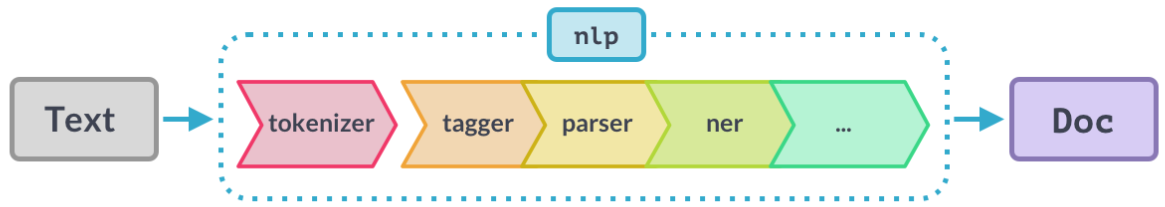

# **Built-in pipeline components**

```
Name      Description               Creates
tagger    Part-of-speech tagger     Token.tag
parser    Dependency parser         Token.dep , Token.head , Doc.sents , Doc.noun_chunks
ner       Named entity recognizer   Doc.ents , Token.ent_iob , Token.ent_type
textcat   Text classifier           Doc.cats
```



## ***Inspecting the pipeline***



- Load the `en_core_web_sm` model and create the `nlp` object.
- Print the names of the pipeline components using `nlp.pipe_names`.
- Print the full pipeline of `(name, component)` tuples using `nlp.pipeline`.

In [ ]:
# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Print the names of the pipeline components
print(nlp.pipe_names)

# Print the full pipeline of (name, component) tuples
print(nlp.pipeline)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x7fb50890a0c0>), ('tagger', <spacy.pipeline.tagger.Tagger object at 0x7fb50890a130>), ('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x7fb507ffe750>), ('attribute_ruler', <spacy.pipeline.attributeruler.AttributeRuler object at 0x7fb507f45500>), ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer object at 0x7fb507f4eb40>), ('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x7fb507ffe950>)]


Whenever you're unsure about the current pipeline, you can inspect it by printing `nlp.pipe_names` or `nlp.pipeline`.

# **Adding custom pipeline components**

- Function that takes a **`doc`** , modifies it and returns it
- Can be added using the **`nlp.add_pipe`** method

### ใน **`spaCy`** version 3 จะต้องมีการพิมพ์
- **`from spacy.language import Language`**
- ใส่ decorator **`@Language.component("custom_component")`** (ชื่อข้างในต้องเป็นสตริง)
- **`nlp.add_pipe('custom_component')`** ข้างในจะต้องเป็นสตริง

In [ ]:
from spacy.language import Language

@Language.component("custom_component")
def custom_component(doc):
    # Do something to the doc here
    return doc
    
nlp.add_pipe('custom_component')

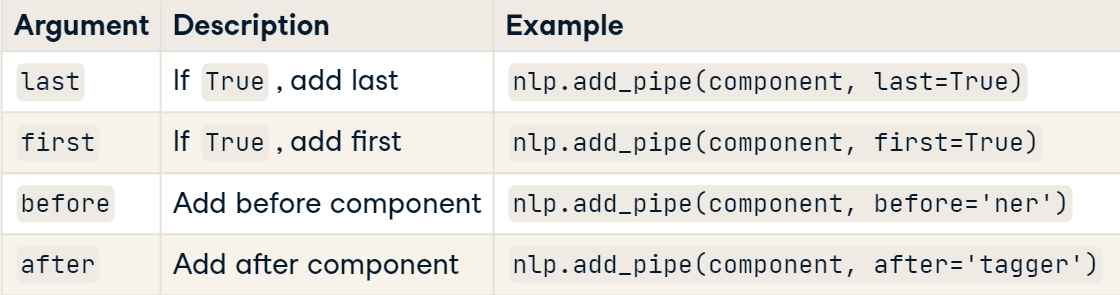



 ## ***Simple components***

The example shows a custom component that prints the character length of a document.

* Complete the component function with the `doc`'s length.
- Add the `length_component` to the existing pipeline as the **first** component.
- Try out the new pipeline and process any text with the `nlp` object – for example `"This is a sentence."`.

In [7]:
from spacy.language import Language

@Language.component("length_component")
def length_component(doc):
    # Get the doc's length
    doc_length = len(doc)
    print("This document is {} tokens long.".format(doc_length))
    # Return the doc
    return doc
  
# Load the small English model and Add the component first in the pipeline
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('length_component', first=True)

# Process a text
doc = nlp('This is a sentence.')
print('Pipeline:', nlp.pipe_names)
nlp.remove_pipe("length_component")

This document is 5 tokens long.
Pipeline: ['length_component', 'tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


('length_component', <function __main__.length_component(doc)>)

## ***Complex components***

Write a custom component that uses the **`PhraseMatcher`** to find animal names in the document and adds the matched spans to the `doc.ents`.

A **`PhraseMatcher`** with the animal patterns has already been created as the variable `matcher`. The small English model is available as the variable `nlp`. The `Span` object has already been imported for you.


- Define the custom component and apply the `matcher` to the `doc`.
- Create a `Span` for each match, assign the label ID for `'ANIMAL'` and overwrite the `doc.ents` with the new spans.
- Add the new component to the pipeline *after* the `'ner'` component.
- Process the text and print the entity text and entity label for the entities in `doc.ents`

In [8]:
# ใน spaCy version 3+ จะต้องพิมพ์ขั้นตอนพวกนี้เพิ่ม
from spacy.language import Language

matcher = PhraseMatcher(nlp.vocab)
patterns = list(nlp.pipe(['cat', 'Golden Retriever']))
matcher.add('any text', None, *patterns)


# Define the custom component
@Language.component("animal_component")
def animal_component(doc):
    # Create a Span for each match and assign the label 'ANIMAL'
    # and overwrite the doc.ents with the matched spans
    doc.ents = [Span(doc, start, end, label='ANIMAL')
                for match_id, start, end in matcher(doc)]
    return doc
    
# Add the component to the pipeline after the 'ner' component 
nlp.add_pipe('animal_component', after='ner')

# Process the text and print the text and label for the doc.ents
doc = nlp("I have a cat and a Golden Retriever")
print([(ent.text, ent.label_) for ent in doc.ents])
nlp.remove_pipe("animal_component")

[('cat', 'ANIMAL'), ('Golden Retriever', 'ANIMAL')]


('animal_component', <function __main__.animal_component(doc)>)

In [ ]:
nlp.remove_pipe("animal_component")
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

# **Setting custom attributes**

- Add custom metadata to **`Doc`**, **`Token`** and **`Span`**
- Accessible via the **`._`** property

In [ ]:
doc._.title = 'My document'
token._.is_color = True
span._.has_color = False

- registered on the global **`Doc`** , **`Token`** or **`Span`** using the **`.set_extension`** method

In [ ]:
# Import global classes
from spacy.tokens import Doc, Token, Span

# Set extensions on the Doc, Token and Span
Doc.set_extension('title', default=None)
Token.set_extension('is_color', default=False)
Span.set_extension('has_color', default=False)

- The first argument in **`.set_extension`** method ก็คือ ชื่อของ custom attribute

# **Attribute extensions**
- Set a default value that can be overwritten

In [4]:
from spacy.tokens import Token

nlp = spacy.load('en_core_web_sm')

# Set extension on the Token with default value
Token.set_extension('is_color', default=False, force=True)
doc = nlp("The sky is blue.")

# Overwrite extension attribute value
doc[3]._.is_color = True

# **Property extensions on `Token`**

- Define a getter and an optional setter function

In [7]:
from spacy.tokens import Token

# Define getter function
def get_is_color(token):
    colors = ['red', 'yellow', 'blue']
    print('getter function is being called.')
    return token.text in colors

# Set extension on the Token with getter
Token.set_extension('is_color', getter=get_is_color, force=True)
doc = nlp("The sky is blue.")

print(doc[3]._.is_color, '-', doc[3].text)

getter function is being called.
True - blue


In [8]:
doc[3].text

'blue'

***Getter*** only called when you <ins>***retrieve***</ins> the attribute value

In [9]:
doc[3]._.is_color

getter function is being called.


True

# **Property extensions on `Span`**

- **`Span`** extensions should almost always use a **`getter`**

In [10]:
from spacy.tokens import Span

# Define getter function on Span
def get_has_color(span):
    colors = ['red', 'yellow', 'blue']
    return any(token.text in colors for token in span)

# Set extension on the Span with getter
Span.set_extension('has_color', getter=get_has_color)
doc = nlp("The sky is blue.")

print(doc[1:4]._.has_color, '-', doc[1:4].text)
print(doc[0:2]._.has_color, '-', doc[0:2].text)

True - sky is blue
False - The sky


# **Method extensions**

- Assign a **function** that becomes available as an object method
- Lets you pass **arguments** to the extension function

In [15]:
from spacy.tokens import Doc

# Define method with arguments
def has_token(doc, token_text):
    in_doc = token_text in [token.text for token in doc]
    return in_doc # สไลด์ตกบรรทัดนี้ไป

# Set extension on the Doc with method
Doc.set_extension('has_token', method=has_token, force=True)
doc = nlp("The sky is blue.")

print(doc._.has_token('blue'), '- blue')
print(doc._.has_token('cloud'), '- cloud')

True - blue
False - cloud


## ***Setting extension attributes (1)***

Let's practice setting some extension attributes. The **`nlp`** object has already been created for you and the **`Doc`**, **`Token`** and **`Span`** classes are already imported.

*Remember that if you run your code more than once, you might see an error message that the extension already exists. To solve this, you can set `force=True` on **`.set_extension()`**.*

- Use **`Token.set_extension`** to register `is_country` (default `False`).
- Update it for `"Spain"` and print it for all tokens.



In [17]:
from spacy.tokens import Doc, Token, Span

# Register the Token extension attribute 'is_country' with the default value False
Token.set_extension('is_country', default=False)

# Process the text and set the is_country attribute to True for the token "Spain"
doc = nlp("I live in Spain.")
doc[3]._.is_country = True

# Print the token text and the is_country attribute for all tokens
print([(token.text, token._.is_country) for token in doc])

[('I', False), ('live', False), ('in', False), ('Spain', True), ('.', False)]


* Use **`Token.set_extension`** to register `'reversed'` (getter function `get_reversed`).
* Print its value for each token.

In [18]:
from spacy.tokens import Doc, Token, Span

# Define the getter function that takes a token and returns its reversed text
def get_reversed(token):
    return token.text[::-1]
  
# Register the Token property extension 'reversed' with the getter get_reversed
Token.set_extension('reversed', getter=get_reversed)

# Process the text and print the reversed attribute for each token
doc = nlp("All generalizations are false, including this one.")
for token in doc:
    print('reversed:', token._.reversed)

reversed: llA
reversed: snoitazilareneg
reversed: era
reversed: eslaf
reversed: ,
reversed: gnidulcni
reversed: siht
reversed: eno
reversed: .


## **Setting extension attributes (2)**

Let's try setting some more complex attributes using getters and method extensions. The **`nlp`** object has already been created for you and the **`Doc`**, **`Token`** and **`Span`** classes are already imported.

- Complete the `has_number` function .
- Use **`Doc.set_extension`** to register `'has_number'` (getter `get_has_number`) and print its value.

In [19]:
from spacy.tokens import Doc, Token, Span

# Define the getter function
def get_has_number(doc):
    # Return if any of the tokens in the doc return True for token.like_num
    return any(token.like_num for token in doc)

# Register the Doc property extension 'has_number' with the getter get_has_number
Doc.set_extension('has_number', getter=get_has_number)

# Process the text and check the custom has_number attribute 
doc = nlp("The museum closed for five years in 2012.")
print('has_number:', doc._.has_number)

has_number: True


- Use **`Span.set_extension`** to register `'to_html'` (method `to_html`).
- Call it on `doc[0:2]` with the tag `'strong'`

In [20]:
# Define the method
def to_html(span, tag):
    # Wrap the span text in a HTML tag and return it
    return '<{tag}>{text}</{tag}>'.format(tag=tag, text=span.text)

# Register the Span property extension 'to_html' with the method to_html
Span.set_extension('to_html', method=to_html, force=True)

# Process the text and call the to_html method on the span with the tag name 'strong'
doc = nlp("Hello world, this is a sentence.")
span = doc[0:2]
print(span._.to_html('strong'))

<strong>Hello world</strong>


## **Entities and extensions**

In this exercise, you'll combine custom extension attributes with the model's predictions and create an attribute getter that returns a Wikipedia search URL if the span is a person, organization, or location.

The **`Span`** class is already imported and the **`nlp`** object has been created for you.

- Complete the `get_wikipedia_url` getter so it only returns the URL if the span's label is in the list of labels.

- Set the **`Span`** extension `'wikipedia_url'` using the getter `get_wikipedia_url`.
- Iterate over the entities in the `doc` and output their Wikipedia URL.

In [21]:
def get_wikipedia_url(span):
    # Get a Wikipedia URL if the span has one of the labels
    if span.label_ in ('PERSON', 'ORG', 'GPE', 'LOCATION'):
        entity_text = span.text.replace(' ', '_')
        return "https://en.wikipedia.org/w/index.php?search=" + entity_text

# Set the Span extension wikipedia_url using get getter get_wikipedia_url
Span.set_extension('wikipedia_url', getter=get_wikipedia_url)

doc = nlp("In over fifty years from his very first recordings right through to his last album, David Bowie was at the vanguard of contemporary culture.")
for ent in doc.ents:
    # Print the text and Wikipedia URL of the entity
    print(ent.text, ent._.wikipedia_url)  

over fifty years None
first None
David Bowie https://en.wikipedia.org/w/index.php?search=David_Bowie


You now have a pipeline component that uses named entities predicted by the model to generate Wikipedia URLs and adds them as a custom attribute. 

## **Components with extensions**

Extension attributes are especially powerful if they're combined with custom pipeline components. In this exercise, you'll write a pipeline component that finds country names and a custom extension attribute that returns a country's capital, if available.

The **`nlp`** object has already been created and the **`Span`** class is already imported. A phrase matcher with all countries is available as the variable `matcher`. A dictionary of countries mapped to their capital cities is available as the variable `capitals`.


- Complete the `countries_component` and create a **`Span`** with the label `'GPE'` (geopolitical entity) for all matches.
- Add the component to the pipeline.
- Register the Span extension attribute `'capital'` with the getter `get_capital`.
- Process the text and print the entity text, entity label and entity capital for each entity span in `doc.ents`.

In [24]:
from spacy.language import Language

nlp = spacy.load('en_core_web_lg')
COUNTRIES = ['Afghanistan',  'Åland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'United States Minor Outlying Islands', 'Virgin Islands (British)', 'Virgin Islands (U.S.)', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cabo Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', 'Congo (Democratic Republic of the)', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France','French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana','Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Heard Island and McDonald Islands', 'Holy See', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', "Côte d'Ivoire", 'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 'Lesotho','Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Macedonia (the former Yugoslav Republic of)', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania','Mauritius', 'Mayotte', 'Mexico', 'Micronesia (Federated States of)', 'Moldova (Republic of)', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island', "Korea (Democratic People's Republic of)", 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestine, State of', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Kosovo', 'Réunion', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Barthélemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Georgia and the South Sandwich Islands', 'Korea (Republic of)', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Svalbard and Jan Mayen', 'Swaziland', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan', 'Tajikistan', 'Tanzania, United Republic of', 'Thailand', 'Timor-Leste', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom of Great Britain and Northern Ireland', 'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe']
capitals = {'Afghanistan': 'Kabul',  'Albania': 'Tirana', 'Algeria': 'Algiers', 'American Samoa': 'Pago Pago', 'Andorra': 'Andorra la Vella', 'Angola': 'Luanda', 'Anguilla': 'The Valley', 'Antarctica': '', 'Antigua and Barbuda': "Saint John's", 'Argentina': 'Buenos Aires', 'Armenia': 'Yerevan', 'Aruba': 'Oranjestad', 'Australia': 'Canberra', 'Austria': 'Vienna', 'Azerbaijan': 'Baku', 'Bahamas': 'Nassau', 'Bahrain': 'Manama', 'Bangladesh': 'Dhaka', 'Barbados': 'Bridgetown', 'Belarus': 'Minsk', 'Belgium': 'Brussels', 'Belize': 'Belmopan', 'Benin': 'Porto-Novo', 'Bermuda': 'Hamilton', 'Bhutan': 'Thimphu', 'Bolivia (Plurinational State of)': 'Sucre', 'Bonaire, Sint Eustatius and Saba': 'Kralendijk', 'Bosnia and Herzegovina': 'Sarajevo', 'Botswana': 'Gaborone', 'Bouvet Island': '', 'Brazil': 'Brasília', 'British Indian Ocean Territory': 'Diego Garcia', 'Brunei Darussalam': 'Bandar Seri Begawan', 'Bulgaria': 'Sofia', 'Burkina Faso': 'Ouagadougou', 'Burundi': 'Bujumbura', 'Cabo Verde': 'Praia', 'Cambodia': 'Phnom Penh', 'Cameroon': 'Yaoundé', 'Canada': 'Ottawa', 'Cayman Islands': 'George Town', 'Central African Republic': 'Bangui', 'Chad': "N'Djamena", 'Chile': 'Santiago', 'China': 'Beijing', 'Christmas Island': 'Flying Fish Cove', 'Cocos (Keeling) Islands': 'West Island', 'Colombia': 'Bogotá', 'Comoros': 'Moroni', 'Congo': 'Brazzaville', 'Congo (Democratic Republic of the)': 'Kinshasa', 'Cook Islands': 'Avarua', 'Costa Rica': 'San José', 'Croatia': 'Zagreb', 'Cuba': 'Havana', 'Curaçao': 'Willemstad', 'Cyprus': 'Nicosia', 'Czech Republic': 'Prague', "Côte d'Ivoire": 'Yamoussoukro', 'Denmark': 'Copenhagen', 'Djibouti': 'Djibouti', 'Dominica': 'Roseau', 'Dominican Republic': 'Santo Domingo', 'Ecuador': 'Quito', 'Egypt': 'Cairo', 'El Salvador': 'San Salvador', 'Equatorial Guinea': 'Malabo', 'Eritrea': 'Asmara', 'Estonia': 'Tallinn', 'Ethiopia': 'Addis Ababa', 'Falkland Islands (Malvinas)': 'Stanley', 'Faroe Islands': 'Tórshavn', 'Fiji': 'Suva', 'Finland': 'Helsinki', 'France': 'Paris', 'French Guiana': 'Cayenne', 'French Polynesia': 'Papeetē', 'French Southern Territories': 'Port-aux-Français', 'Gabon': 'Libreville', 'Gambia': 'Banjul','Georgia': 'Tbilisi','Germany': 'Berlin', 'Ghana': 'Accra', 'Gibraltar': 'Gibraltar', 'Greece': 'Athens', 'Greenland': 'Nuuk', 'Grenada': "St. George's", 'Guadeloupe': 'Basse-Terre', 'Guam': 'Hagåtña', 'Guatemala': 'Guatemala City', 'Guernsey': 'St. Peter Port', 'Guinea': 'Conakry', 'Guinea-Bissau': 'Bissau', 'Guyana': 'Georgetown', 'Haiti': 'Port-au-Prince', 'Heard Island and McDonald Islands': '', 'Holy See': 'Rome', 'Honduras': 'Tegucigalpa', 'Hong Kong': 'City of Victoria', 'Hungary': 'Budapest', 'Iceland': 'Reykjavík', 'India': 'New Delhi', 'Indonesia': 'Jakarta', 'Iran (Islamic Republic of)': 'Tehran', 'Iraq': 'Baghdad', 'Ireland': 'Dublin', 'Isle of Man': 'Douglas', 'Israel': 'Jerusalem', 'Italy': 'Rome', 'Jamaica': 'Kingston', 'Japan': 'Tokyo', 'Jersey': 'Saint Helier', 'Jordan': 'Amman', 'Kazakhstan': 'Astana', 'Kenya': 'Nairobi', 'Kiribati': 'South Tarawa', "Korea (Democratic People's Republic of)": 'Pyongyang', 'Korea (Republic of)': 'Seoul', 'Kuwait': 'Kuwait City', 'Kyrgyzstan': 'Bishkek', "Lao People's Democratic Republic": 'Vientiane', 'Latvia': 'Riga', 'Lebanon': 'Beirut', 'Lesotho': 'Maseru', 'Liberia': 'Monrovia', 'Libya': 'Tripoli', 'Liechtenstein': 'Vaduz', 'Lithuania': 'Vilnius', 'Luxembourg': 'Luxembourg', 'Macao': '', 'Macedonia (the former Yugoslav Republic of)': 'Skopje', 'Madagascar': 'Antananarivo', 'Malawi': 'Lilongwe', 'Malaysia': 'Kuala Lumpur', 'Maldives': 'Malé', 'Mali': 'Bamako', 'Malta': 'Valletta', 'Marshall Islands': 'Majuro', 'Martinique': 'Fort-de-France', 'Mauritania': 'Nouakchott', 'Mauritius': 'Port Louis', 'Mayotte': 'Mamoudzou', 'Mexico': 'Mexico City', 'Micronesia (Federated States of)': 'Palikir', 'Moldova (Republic of)': 'Chișinău', 'Monaco': 'Monaco', 'Mongolia': 'Ulan Bator', 'Montenegro': 'Podgorica', 'Montserrat': 'Plymouth', 'Morocco': 'Rabat', 'Mozambique': 'Maputo', 'Myanmar': 'Naypyidaw', 'Namibia': 'Windhoek', 'Nauru': 'Yaren', 'Nepal': 'Kathmandu', 'Netherlands': 'Amsterdam', 'New Caledonia': 'Nouméa', 'New Zealand': 'Wellington', 'Nicaragua': 'Managua', 'Niger': 'Niamey', 'Nigeria': 'Abuja', 'Niue': 'Alofi', 'Norfolk Island': 'Kingston', 'Northern Mariana Islands': 'Saipan', 'Norway': 'Oslo', 'Oman': 'Muscat', 'Pakistan': 'Islamabad', 'Palau': 'Ngerulmud', 'Palestine, State of': 'Ramallah', 'Panama': 'Panama City', 'Papua New Guinea': 'Port Moresby', 'Paraguay': 'Asunción', 'Peru': 'Lima', 'Philippines': 'Manila', 'Pitcairn': 'Adamstown', 'Poland': 'Warsaw', 'Portugal': 'Lisbon', 'Puerto Rico': 'San Juan', 'Qatar': 'Doha','Republic of Kosovo': 'Pristina', 'Romania': 'Bucharest', 'Russian Federation': 'Moscow', 'Rwanda': 'Kigali', 'Réunion': 'Saint-Denis', 'Saint Barthélemy': 'Gustavia', 'Saint Helena, Ascension and Tristan da Cunha': 'Jamestown','Saint Kitts and Nevis': 'Basseterre', 'Saint Lucia': 'Castries', 'Saint Martin (French part)': 'Marigot', 'Saint Pierre and Miquelon': 'Saint-Pierre', 'Saint Vincent and the Grenadines': 'Kingstown', 'Samoa': 'Apia', 'San Marino': 'City of San Marino', 'Sao Tome and Principe': 'São Tomé', 'Saudi Arabia': 'Riyadh', 'Senegal': 'Dakar', 'Serbia': 'Belgrade', 'Seychelles': 'Victoria', 'Sierra Leone': 'Freetown', 'Singapore': 'Singapore', 'Sint Maarten (Dutch part)': 'Philipsburg', 'Slovakia': 'Bratislava', 'Slovenia': 'Ljubljana', 'Solomon Islands': 'Honiara', 'Somalia': 'Mogadishu', 'South Africa': 'Pretoria', 'South Georgia and the South Sandwich Islands': 'King Edward Point', 'South Sudan': 'Juba', 'Spain': 'Madrid', 'Sri Lanka': 'Colombo', 'Sudan': 'Khartoum', 'Suriname': 'Paramaribo', 'Svalbard and Jan Mayen': 'Longyearbyen', 'Swaziland': 'Lobamba', 'Sweden': 'Stockholm', 'Switzerland': 'Bern', 'Syrian Arab Republic': 'Damascus', 'Taiwan': 'Taipei', 'Tajikistan': 'Dushanbe', 'Tanzania, United Republic of': 'Dodoma', 'Thailand': 'Bangkok', 'Timor-Leste': 'Dili', 'Togo': 'Lomé', 'Tokelau': 'Fakaofo', 'Tonga': "Nuku'alofa", 'Trinidad and Tobago': 'Port of Spain', 'Tunisia': 'Tunis', 'Turkey': 'Ankara', 'Turkmenistan': 'Ashgabat', 'Turks and Caicos Islands': 'Cockburn Town', 'Tuvalu': 'Funafuti', 'Uganda': 'Kampala', 'Ukraine': 'Kiev', 'United Arab Emirates': 'Abu Dhabi', 'United Kingdom of Great Britain and Northern Ireland': 'London', 'United States Minor Outlying Islands': '', 'United States of America': 'Washington, D.C.', 'Uruguay': 'Montevideo', 'Uzbekistan': 'Tashkent', 'Vanuatu': 'Port Vila', 'Venezuela (Bolivarian Republic of)': 'Caracas', 'Viet Nam': 'Hanoi', 'Virgin Islands (British)': 'Road Town', 'Virgin Islands (U.S.)': 'Charlotte Amalie', 'Wallis and Futuna': 'Mata-Utu', 'Western Sahara': 'El Aaiún', 'Yemen': "Sana'a", 'Zambia': 'Lusaka', 'Zimbabwe': 'Harare', 'Åland Islands': 'Mariehamn'}

matcher = PhraseMatcher(nlp.vocab)
patterns = list(nlp.pipe(COUNTRIES))
matcher.add('COUNTRY', None, *patterns)

# Define the custom component
@Language.component('countries_component')
def countries_component(doc):
    # Create an entity Span with the label 'GPE' for all matches
    doc.ents = [Span(doc, start, end, label='GPE')
                for match_id, start, end in matcher(doc)]
    return doc

# Add the component to the pipeline
nlp.add_pipe('countries_component')

# Register capital and getter that looks up the span text in country capitals
Span.set_extension('capital', getter=lambda span: capitals.get(span.text))

# Process the text and print the entity text, label and capital attributes
doc = nlp("Czech Republic may help Slovakia protect its airspace")
print([(ent.text, ent.label_, ent._.capital) for ent in doc.ents])

[('Czech Republic', 'GPE', 'Prague'), ('Slovakia', 'GPE', 'Bratislava')]


This is a great example of how you can add structured data to your spaCy pipeline.

# **Processing large volumes of text**

- Use **`nlp.pipe`** method
- Processes texts as a stream, yields **`Doc`** objects
- Much faster than calling **`nlp`** on each text

### **BAD:**

In [ ]:
docs = [nlp(text) for text in LOTS_OF_TEXTS]

### **GOOD:**

In [ ]:
docs = list(nlp.pipe(LOTS_OF_TEXTS))

# **Passing in context (1)**

- Setting **`as_tuples=True`** on **`nlp.pipe`** lets you pass in `(text, context)` tuples
- Yields `(doc, context)` tuples
- Useful for associating metadata with the **`doc`**

In [3]:
nlp = spacy.load('en_core_web_lg')

data = [('This is a text', {'id': 1, 'page_number': 15}), 
        ('And another text', {'id': 2, 'page_number': 16})
        ]
for doc, context in nlp.pipe(data, as_tuples=True):
    print(doc.text, context['page_number'])

This is a text 15
And another text 16


# **Add context meta data to custom attributes**

In [6]:
from spacy.tokens import Doc

Doc.set_extension('id', default=None, force=True)
Doc.set_extension('page_number', default=None, force=True)

data = [('This is a text', {'id': 1, 'page_number': 15}),
        ('And another text', {'id': 2, 'page_number': 16})]

for doc, context in nlp.pipe(data, as_tuples=True):
    doc._.id = context['id']
    doc._.page_number = context['page_number']
    print(doc._.id, doc._.page_number)

1 15
2 16


# **Using only the tokenizer**

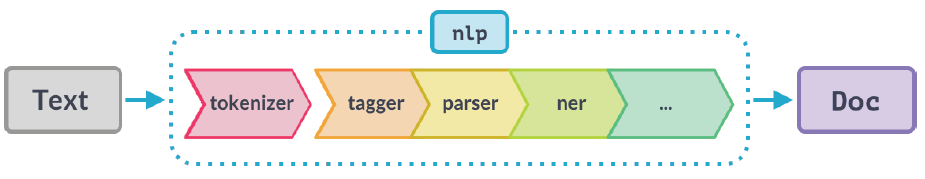

- Do NOT run the whole pipeline!
### Use **`nlp.make_doc`** to turn a text in to a **`Doc`** object

# **Disabling pipeline components**

- Use **`nlp.disable_pipes`** to temporarily disable one or more pipes

In [ ]:
# Disable tagger and parser
with nlp.disable_pipes('tagger', 'parser'):
    # Process the text and print the entities
    doc = nlp(text)
    print(doc.ents)

## ***Processing streams***

Use **`nlp.pipe`** for more efficient text processing. The **`nlp`** object has already been created for you. A list of tweets about a popular American fast food chain are available as the variable `TEXTS`.

- Rewrite the example to use **`nlp.pipe`**. Instead of iterating over the texts and processing them, iterate over the **`doc`** objects yielded by **`nlp.pipe`**.



In [7]:
TEXTS = ['McDonalds is my favorite restaurant.', 
         'Here I thought @McDonalds only had precooked burgers but it seems they only have not cooked ones?? I have no time to get sick..',
         'People really still eat McDonalds :(',
         'The McDonalds in Spain has chicken wings. My heart is so happy ',
         '@McDonalds Please bring back the most delicious fast food sandwich of all times!!....The Arch Deluxe :P',
         'please hurry and open. I WANT A #McRib SANDWICH SO BAD! :D',
         'This morning i made a terrible decision by gettin mcdonalds and now my stomach is payin for it']

# Process the texts and print the adjectives
for text in TEXTS:
    doc = nlp(text)
    print([token.text for token in doc if token.pos_ == 'ADJ'])

['favorite']
['sick']
[]
['happy']
['delicious', 'fast']
['open', 'BAD']
['terrible', 'payin']


In [15]:
# Process the texts and print the adjectives
for doc in nlp.pipe(TEXTS):
    print([token.text for token in doc if token.pos_ == 'ADJ'])

['favorite']
['sick']
[]
['happy']
['delicious', 'fast']
['open', 'BAD']
['terrible', 'payin']


- Rewrite the example to use **`nlp.pipe`**. Don't forget to call **`list()`** around the result to turn it into a list.

In [16]:
# Process the texts and print the entities
docs = [nlp(text) for text in TEXTS]
entities = [doc.ents for doc in docs]
print(*entities)

(McDonalds,) (@McDonalds,) (McDonalds,) (McDonalds, Spain) (@McDonalds,) () (This morning, mcdonalds)


In [17]:
# Process the texts and print the entities
docs = list(nlp.pipe(TEXTS))
entities = [doc.ents for doc in docs]
print(*entities)

(McDonalds,) (@McDonalds,) (McDonalds,) (McDonalds, Spain) (@McDonalds,) () (This morning, mcdonalds)


Rewrite the example to use **`nlp.pipe`**. Don't forget to call **`list()`** around the result to turn it into a list.

In [19]:
people = ['David Bowie', 'Angela Merkel', 'Lady Gaga']

# Create a list of patterns for the PhraseMatcher
patterns = [nlp(person) for person in people]
patterns

[David Bowie, Angela Merkel, Lady Gaga]

In [20]:
people = ['David Bowie', 'Angela Merkel', 'Lady Gaga']

# Create a list of patterns for the PhraseMatcher
patterns = list(nlp.pipe(people))
patterns

[David Bowie, Angela Merkel, Lady Gaga]

## ***Processing data with context***

Use custom attributes to add author and book information to quotes.

A list of `(text, context)` examples is available as the variable `DATA`. The texts are quotes from famous books, and the contexts dictionaries with the keys `'author'` and `'book'`. The **`nlp`** object has already been created for you.


- Import the **`Doc`** class and use the **`.set_extension()`** method to register the custom attributes `'author'` and `'book'`, which default to `None`.

- Process the `(text, context)` tuples in `DATA` using **`nlp.pipe`** with `as_tuples=True`.

- Overwrite the `doc._.book` and `doc._.author` with the respective info passed in as the context.

In [21]:
DATA = [('One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.',  {'author': 'Franz Kafka', 'book': 'Metamorphosis'}),
        ("I know not all that may be coming, but be it what it will, I'll go to it laughing.", {'author': 'Herman Melville', 'book': 'Moby-Dick or, The Whale'}),
        ('It was the best of times, it was the worst of times.',  {'author': 'Charles Dickens', 'book': 'A Tale of Two Cities'}),
        ('The only people for me are the mad ones, the ones who are mad to live, mad to talk, mad to be saved, desirous of everything at the same time, the ones who never yawn or say a commonplace thing, but burn, burn, burn like fabulous yellow roman candles exploding like spiders across the stars.',  {'author': 'Jack Kerouac', 'book': 'On the Road'}),
        ('It was a bright cold day in April, and the clocks were striking thirteen.',  {'author': 'George Orwell', 'book': '1984'}),
        ('Nowadays people know the price of everything and the value of nothing.',  {'author': 'Oscar Wilde', 'book': 'The Picture Of Dorian Gray'})]
        
# Import the Doc class and register the extensions 'author' and 'book'
from spacy.tokens import Doc
Doc.set_extension('book', default=None)
Doc.set_extension('author', default=None)

for doc, context in nlp.pipe(DATA, as_tuples=True):
    # Set the doc._.book and doc._.author attributes from the context
    doc._.book = context['book']
    doc._.author = context['author']
    
    # Print the text and custom attribute data
    print(doc.text, '\n', "— '{}' by {}".format(doc._.book, doc._.author), '\n')

One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. 
 — 'Metamorphosis' by Franz Kafka 

I know not all that may be coming, but be it what it will, I'll go to it laughing. 
 — 'Moby-Dick or, The Whale' by Herman Melville 

It was the best of times, it was the worst of times. 
 — 'A Tale of Two Cities' by Charles Dickens 

The only people for me are the mad ones, the ones who are mad to live, mad to talk, mad to be saved, desirous of everything at the same time, the ones who never yawn or say a commonplace thing, but burn, burn, burn like fabulous yellow roman candles exploding like spiders across the stars. 
 — 'On the Road' by Jack Kerouac 

It was a bright cold day in April, and the clocks were striking thirteen. 
 — '1984' by George Orwell 

Nowadays people know the price of everything and the value of nothing. 
 — 'The Picture Of Dorian Gray' by Oscar Wilde 



The same technique is useful for a variety of tasks. For example, you could pass in page or paragraph numbers to relate the processed **`Doc`** back to the position in a larger document. Or you could pass in other structured data like IDs referring to a knowledge base.

## ***Selective processing***

Use the **`nlp.make_doc`** and **`nlp.disable_pipes`** methods to only run selected components when processing a text. The small English model is already loaded in as the `nlp` object.


- Rewrite the code to only tokenize the text using **`nlp.make_doc`**.

In [22]:
text = "Chick-fil-A is an American fast food restaurant chain headquartered in the city of College Park, Georgia, specializing in chicken sandwiches."

# Only tokenize the text
doc = nlp(text)

print([token.text for token in doc])

['Chick', '-', 'fil', '-', 'A', 'is', 'an', 'American', 'fast', 'food', 'restaurant', 'chain', 'headquartered', 'in', 'the', 'city', 'of', 'College', 'Park', ',', 'Georgia', ',', 'specializing', 'in', 'chicken', 'sandwiches', '.']


In [23]:
text = "Chick-fil-A is an American fast food restaurant chain headquartered in the city of College Park, Georgia, specializing in chicken sandwiches."

# Only tokenize the text
doc = nlp.make_doc(text)

print([token.text for token in doc])

['Chick', '-', 'fil', '-', 'A', 'is', 'an', 'American', 'fast', 'food', 'restaurant', 'chain', 'headquartered', 'in', 'the', 'city', 'of', 'College', 'Park', ',', 'Georgia', ',', 'specializing', 'in', 'chicken', 'sandwiches', '.']


- Disable the tagger and parser using the **`nlp.disable_pipes`** method.
- Process the text and print all entities in the `doc`.

In [25]:
text = "Chick-fil-A is an American fast food restaurant chain headquartered in the city of College Park, Georgia, specializing in chicken sandwiches."

with nlp.disable_pipes('tagger', 'parser'):
    # Process the text
    doc = nlp(text)
    # Print the entities in the doc
    print(doc.ents)

(Chick-fil-A, American, College Park, Georgia)


Now that you've practiced the performance tips and tricks, you're ready for the next chapter and training spaCy's ***neural network*** models.

# **How training works**

1. **Initialize** the model weights randomly with **`nlp.begin_training`**
2. **Predict** a few examples with the current weights by calling **`nlp.update`**
3. **Compare** prediction with true labels
4. **Calculate** how to change weights to improve predictions
5. **Update** weights slightly
6. Go back to 2.

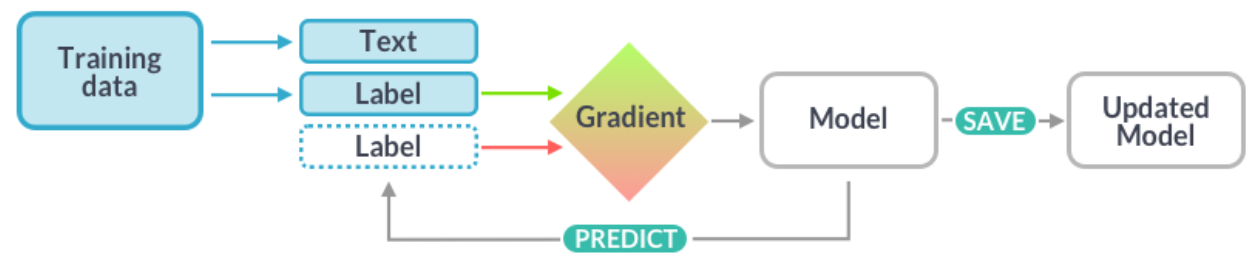

- **Training data**: Examples and their annotations.
- **Text**: The input text the model should predict a label for.
- **Label**: The label the model should predict.
- **Gradient**: How to change the weights.

# **Example: Training the entity recognizer**

- Examples need to come with context
- 0 คือ start 8 คือ end (ไม่รวม 8)

In [ ]:
("iPhone X is coming", {'entities': [(0, 8, 'GADGET')]})

- Texts with no entities are also important

In [ ]:
("I need a new phone! Any tips?", {'entities': []})

**Goal**: teach the model to recognize new entities in similar contexts

## ***Creating training data (1)***

spaCy's rule-based **`Matcher`** is a great way to quickly create training data for named entity models. A list of sentences is available as the variable `TEXTS`.  We want to find all mentions of different iPhone models, so we can create training data to teach a model to recognize them as `'GADGET'`.

The **`nlp`** object has already been created for you and the **`Matcher`** is available as the variable `matcher`.

- Write a pattern for two tokens whose lowercase forms match `'iphone'` and `'x'`.
- Write a pattern for two tokens: one token whose lowercase form matches `'iphone'` and an optional digit using the `'?'` operator.

In [2]:
TEXTS = ['How to preorder the iPhone X',  
         'iPhone X is coming',  
         'Should I pay $1,000 for the iPhone X?', 
         'The iPhone 8 reviews are here', 
         'Your iPhone goes up to 11 today', 
         'I need a new phone! Any tips?']

nlp = spacy.load('en_core_web_lg')
matcher = Matcher(nlp.vocab)

# Two tokens whose lowercase forms match 'iphone' and 'x'
pattern1 = [{'LOWER': 'iphone'}, {'LOWER': 'x'}]

# Token whose lowercase form matches 'iphone' and an optional digit
pattern2 = [{'LOWER': 'iphone'}, {'IS_DIGIT': True, 'OP': '?'}]

# Add patterns to the matcher
matcher.add('GADGET', [pattern1, pattern2])

## ***Creating training data (2)***

Let's use the match patterns we've created above to bootstrap a set of training examples. The **`nlp`** object has already been created and the **`Matcher`** with the added patterns `pattern1` and `pattern2` is available as the variable `matcher`. A list of sentences is available as the variable `TEXTS`.

- Create a **`doc`** object for each text using **`nlp.pipe`** and find the matches in it.
- Create a list of` (start, end, label)` tuples for the matches.

In [3]:
# Create a Doc object for each text in TEXTS
for doc in nlp.pipe(TEXTS):
    # Find the matches in the doc
    matches = matcher(doc)
    
    # Get a list of (start, end, label) tuples of matches in the text
    entities = [(start, end, 'GADGET') for match_id, start, end in matches]
    print(doc.text, entities)    

How to preorder the iPhone X [(4, 6, 'GADGET'), (4, 5, 'GADGET')]
iPhone X is coming [(0, 2, 'GADGET'), (0, 1, 'GADGET')]
Should I pay $1,000 for the iPhone X? [(7, 9, 'GADGET'), (7, 8, 'GADGET')]
The iPhone 8 reviews are here [(1, 2, 'GADGET'), (1, 3, 'GADGET')]
Your iPhone goes up to 11 today [(1, 2, 'GADGET')]
I need a new phone! Any tips? []


- Match on the **`doc`** and create a list of matched spans.
- Format each example as a tuple of the text and a dict, mapping `'entities'` to the entity tuples.
- Append the example to `TRAINING_DATA` and inspect the printed data.

In [4]:
TRAINING_DATA = []

# Create a Doc object for each text in TEXTS
for doc in nlp.pipe(TEXTS):
    # Match on the doc and create a list of matched spans
    spans = [doc[start: end] for match_id, start, end in matcher(doc)]
    # Get (start character, end character, label) tuples of matches
    entities = [(span.start_char, span.end_char, 'GADGET') for span in spans]
    
    # Format the matches as a (doc.text, entities) tuple
    training_example = (doc.text, {'entities': entities})
    # Append the example to the training data
    TRAINING_DATA.append(training_example)
    
print(*TRAINING_DATA, sep='\n')    

('How to preorder the iPhone X', {'entities': [(20, 28, 'GADGET'), (20, 26, 'GADGET')]})
('iPhone X is coming', {'entities': [(0, 8, 'GADGET'), (0, 6, 'GADGET')]})
('Should I pay $1,000 for the iPhone X?', {'entities': [(28, 36, 'GADGET'), (28, 34, 'GADGET')]})
('The iPhone 8 reviews are here', {'entities': [(4, 10, 'GADGET'), (4, 12, 'GADGET')]})
('Your iPhone goes up to 11 today', {'entities': [(5, 11, 'GADGET')]})
('I need a new phone! Any tips?', {'entities': []})


- *ประโยคที่ 4 ใน spaCy version 2 จะไม่ match*

Before you train a model with the data, you always want to <ins>double-check</ins> that your `matcher` didn't identify any false positives. But that process is still much faster than doing *everything* manually.

# **The steps of a training loop**

1. **Loop** for a number of times.
2. **Shuffle** the training data in each iteration.
3. **Divide** the data into batches.
4. **Update** the model for each batch.
5. **Save** the updated model.

# **Example loop**

Training examples consists of *texts* and `entity` annotations

In [ ]:
import random

TRAINING_DATA = [('How to preorder the iPhone X', {'entities': [(20, 28, 'GADGET'), (20, 26, 'GADGET')]}),
                 ('iPhone X is coming', {'entities': [(0, 8, 'GADGET'), (0, 6, 'GADGET')]}),
                 ('Should I pay $1,000 for the iPhone X?', {'entities': [(28, 36, 'GADGET'), (28, 34, 'GADGET')]}),
                 ('The iPhone 8 reviews are here', {'entities': [(4, 10, 'GADGET'), (4, 12, 'GADGET')]}),
                 ('Your iPhone goes up to 11 today', {'entities': [(5, 11, 'GADGET')]}),
                 ('I need a new phone! Any tips?', {'entities': []})]

# Loop for 10 iterations
for i in range(10):
    # Shuffle the training data
    random.shuffle(TRAINING_DATA)

    # Create batches and iterate over them
    for batch in spacy.util.minibatch(TRAINING_DATA):
        # Split the batch in texts and annotations
        texts = [text for text, annotation in batch]
        annotations = [annotation for text, annotation in batch]

        # Update the model
        nlp.update(texts, annotations)
        
# Save the model
nlp.to_disk(path_to_model)

# **Setting up a new pipeline from scratch**



In [ ]:
# Start with blank English model
nlp = spacy.blank('en') # blank model ไม่มี pipeline components มีแค่ tokenization 

# Create blank entity recognizer and add it to the pipeline
ner = nlp.create_pipe('ner')
nlp.add_pipe(ner)

# Add a new label
ner.add_label('GADGET')

# Start the training
nlp.begin_training()

# Train for 10 iterations
for i in range(10):
    random.shuffle(examples)
    
    # Divide examples into batches
    for batch in spacy.util.minibatch(examples, size=2):
        texts = [text for text, annotation in batch]
        annotations = [annotation for text, annotation in batch]
        # Update the model
        nlp.update(texts, annotations)

## ***Setting up the pipeline***

Prepare a spaCy pipeline to train the entity recognizer to recognize `'GADGET'` entities in a text – for exampe, "iPhone X".

`spacy` has already been imported for you.

- Create a blank `'en'` model, for example using the **`spacy.blank`** method.
- Create a new entity recognizer using **`nlp.create_pipe`** and add it to the pipeline.
- Add the new label `'GADGET'` to the entity recognizer using the **`.add_label()`** method on the pipeline component.

In [9]:
# Create a blank 'en' model
nlp = spacy.blank('en')

# Create a new entity recognizer and add it to the pipeline
ner = nlp.create_pipe('ner')
nlp.add_pipe('ner')

# Add the label 'GADGET' to the entity recognizer
ner.add_label('GADGET')

1

## ***Building a training loop***

Write a simple training loop from scratch.

The pipeline created above is available as the **`nlp`** object. It already contains the entity recognizer with the added label `'GADGET'`.

The small set of labelled examples created previously is available as the global variable `TRAINING_DATA`. **`spacy`** and **`random`** have already been imported for you.

- Call **`nlp.begin_training`**, create a training loop for 10 iterations and shuffle the training data.

- Create batches of training data using **`spacy.util.minibatch`** and iterate over the batches.

- Convert the `(text, annotations)` tuples in the batch to lists of texts and annotations.

- For each batch, use **`nlp.update`** to update the model with the texts and annotations.

### ไม่เหมือนโค้ดในเซลล์ข้างบนที่เป็นเวอร์ชั่น 2

In [11]:
import random
from spacy.training.example import Example

TRAINING_DATA = [('How to preorder the iPhone X', {'entities': [(20, 28, 'GADGET')]}), 
                 ('iPhone X is coming', {'entities': [(0, 8, 'GADGET')]}),
                 ('Should I pay $1,000 for the iPhone X?', {'entities': [(28, 36, 'GADGET')]}),
                 ('The iPhone 8 reviews are here', {'entities': [(4, 12, 'GADGET')]}),
                 ('Your iPhone goes up to 11 today', {'entities': [(5, 11, 'GADGET')]}),
                 ('I need a new phone! Any tips?', {'entities': []})]


# Start the training
nlp.begin_training()

# Loop for 10 iterations
for i in range(10):
    # Shuffle the training data
    random.shuffle(TRAINING_DATA)
    losses = {}
    
    # Batch the examples and iterate over them
    for batch in spacy.util.minibatch(TRAINING_DATA, size=2):
        for text, annotations in batch:
            # create Example
            doc = nlp.make_doc(text)
            example = Example.from_dict(doc, annotations)

        # Update the model
        nlp.update([example], losses=losses)
        print(losses)

{'ner': 3.3333334922790527}
{'ner': 11.417462706565857}
{'ner': 16.05021107196808}
{'ner': 4.151774644851685}
{'ner': 10.364775776863098}
{'ner': 14.16651463508606}
{'ner': 2.2959331274032593}
{'ner': 6.242449730634689}
{'ner': 8.549944177269936}
{'ner': 1.0431252624839544}
{'ner': 3.3172363992780447}
{'ner': 7.460904087871313}
{'ner': 2.053068606182933}
{'ner': 3.2586456071585417}
{'ner': 3.3726175790652633}
{'ner': 1.6129544986761175}
{'ner': 2.5882778692030115}
{'ner': 3.434320875792764}
{'ner': 2.542280177408429}
{'ner': 3.2267410640479284}
{'ner': 3.6397782088806707}
{'ner': 1.2406446374116058}
{'ner': 1.3774924966526783}
{'ner': 1.411341916283618}
{'ner': 0.01849636487781936}
{'ner': 0.021501421381081798}
{'ner': 0.02417980767729233}
{'ner': 0.0001169818045809734}
{'ner': 0.00011813485628886511}
{'ner': 0.0001515185571512312}


The numbers printed to the IPython shell represent the loss on each iteration. The lower the number, the better. In real life, you normally want to use a lot more data than this, ideally at least a few hundred or a few thousand examples.

## ***Exploring the model***

Let's see how the model performs on unseen data! To speed things up a little, here's a trained model for the label `'GADGET'`, using the examples from the previous exercise, plus a few hundred more. The loaded model is already available as the **`nlp`** object. A list of test texts is available as `TEST_DATA`.

- Process each text in `TEST_DATA` using **`nlp.pipe`**.
- Print the document text and the entities in the text.

In [18]:
TEST_DATA = ['Apple is slowing down the iPhone 8 and iPhone X - how to stop it',
             "I finally understand what the iPhone X 'notch' is for",
             'Everything you need to know about the Samsung Galaxy S9',
             'Looking to compare iPad models? Here’s how the 2018 lineup stacks up',
             'The iPhone 8 and iPhone 8 Plus are smartphones designed, developed, and marketed by Apple',
             'what is the cheapest ipad, especially ipad pro???',
             'Samsung Galaxy is a series of mobile computing devices designed, manufactured and marketed by Samsung Electronics']

# Process each text in TEST_DATA
for doc in nlp.pipe(TEST_DATA):
    # Print the document text and entitites
    print(doc.text)
    print(doc.ents, '\n\n')

Apple is slowing down the iPhone 8 and iPhone X - how to stop it
(iPhone 8, iPhone X) 


I finally understand what the iPhone X 'notch' is for
(iPhone X,) 


Everything you need to know about the Samsung Galaxy S9
() 


Looking to compare iPad models? Here’s how the 2018 lineup stacks up
(2018 lineup,) 


The iPhone 8 and iPhone 8 Plus are smartphones designed, developed, and marketed by Apple
(iPhone 8, iPhone 8) 


what is the cheapest ipad, especially ipad pro???
() 


Samsung Galaxy is a series of mobile computing devices designed, manufactured and marketed by Samsung Electronics
() 




ข้างบน ทำนายได้ไม่ค่อยถูก เพราะไม่ได้ใส่ตัวอย่างเพิ่มเข้ามา จริงๆควรเป็นแบบนี้



```
Apple is slowing down the iPhone 8 and iPhone X - how to stop it
    (iPhone 8, iPhone X) 
    
    
    I finally understand what the iPhone X 'notch' is for
    (iPhone X,) 
    
    
    Everything you need to know about the Samsung Galaxy S9
    (Samsung Galaxy,) 
    
    
    Looking to compare iPad models? Here’s how the 2018 lineup stacks up
    (iPad,) 
    
    
    The iPhone 8 and iPhone 8 Plus are smartphones designed, developed, and marketed by Apple
    (iPhone 8, iPhone 8) 
    
    
    what is the cheapest ipad, especially ipad pro???
    (ipad, ipad) 
    
    
    Samsung Galaxy is a series of mobile computing devices designed, manufactured and marketed by Samsung Electronics
    (Samsung Galaxy,) 
```

On our test data, the model achieved an accuracy of 70%.

# **Problem 1: Models can "forget" things**

- Existing model can overfit on new data
    - e.g.: if you only update it with `WEBSITE` , it can "unlearn" what a `PERSON` is

- # **Solution 1: Mix in previously correct predictions**

    - For example, if you're training `WEBSITE` , also include examples of `PERSON`
    - Run existing spaCy model over data and extract all other relevant entities

**BAD:**

In [ ]:
TRAINING_DATA = [ ('Reddit is a website', {'entities': [(0, 6, 'WEBSITE')]} ) ]

**GOOD:**

In [ ]:
TRAINING_DATA = [ ('Reddit is a website', {'entities': [(0, 6, 'WEBSITE')] } ),
                  ('Obama is a person',   {'entities': [(0, 5, 'PERSON' )] } ) ]

# **Problem 2: Models can't learn everything**

- spaCy's models make predictions based on **local context**
- Model can struggle to learn if decision is difficult to make based on context
- Label scheme needs to be consistent and not too specific
    - For example: `CLOTHING` is better than `ADULT_CLOTHING` and `CHILDRENS_CLOTHING`

- # **Solution 2: Plan your label scheme carefully**

- Pick categories that are re.ected in local context
- More generic is better than too specific
- Add a rule-based system to go from generic labels to specific categories

**BAD:**

In [ ]:
LABELS = ['ADULT_SHOES', 'CHILDRENS_SHOES', 'BANDS_I_LIKE']

**GOOD:**

In [ ]:
LABELS = ['CLOTHING', 'BAND']

## ***Good data vs. bad data***

Here's an excerpt from a training set that labels the entity type `TOURIST_DESTINATION` in traveler reviews.



```
TRAINING_DATA = [('i went to amsterdem last year and the canals were beautiful', {'entities': [(10, 19, 'TOURIST_DESTINATION')]}),
                 ('You should visit Paris once in your life, but the Eiffel Tower is kinda boring',  {'entities': [(17, 22, 'TOURIST_DESTINATION')]}),
                 ("There's also a Paris in Arkansas, lol", {'entities': []}),
                 ('Berlin is perfect for summer holiday: lots of parks, great nightlife, cheap beer!',  {'entities': [(0, 6, 'TOURIST_DESTINATION')]})]
```



In [ ]:
TRAINING_DATA = [('i went to amsterdem last year and the canals were beautiful', {'entities': [(10, 19, 'TOURIST_DESTINATION')]}),
                 ('You should visit Paris once in your life, but the Eiffel Tower is kinda boring',  {'entities': [(17, 22, 'TOURIST_DESTINATION')]}),
                 ("There's also a Paris in Arkansas, lol", {'entities': []}),
                 ('Berlin is perfect for summer holiday: lots of parks, great nightlife, cheap beer!',  {'entities': [(0, 6, 'TOURIST_DESTINATION')]})]

### **Question**

- Why is this data and label scheme problematic?


    - *Whether a place is a tourist destination is a subjective judgement and not a definitive category. It will be very difficult for the entity recognizer to learn.*

- Rewrite the `TRAINING_DATA` to only use the label `GPE` (cities, states, countries) instead of `TOURIST_DESTINATION`.
- Don't forget to add tuples for the `GPE` entities that weren't labeled in the old data.

     - อันที่ว่างๆ นั้นคือต้องใส่สอง tuples สำหรับสองที่



In [2]:
TRAINING_DATA = [
    ("i went to amsterdem last year and the canals were beautiful", {'entities': [(10, 19, 'GPE')]}),
    ("You should visit Paris once in your life, but the Eiffel Tower is kinda boring", {'entities': [(17, 22, 'GPE')]}),
    ("There's also a Paris in Arkansas, lol", {'entities': [(15, 20, 'GPE'), (24, 32, 'GPE')]}),
    ("Berlin is perfect for summer holiday: lots of parks, great nightlife, cheap beer!", {'entities': [(0, 6, 'GPE')]})
]
     
print(*TRAINING_DATA, sep='\n')

('i went to amsterdem last year and the canals were beautiful', {'entities': [(10, 19, 'GPE')]})
('You should visit Paris once in your life, but the Eiffel Tower is kinda boring', {'entities': [(17, 22, 'GPE')]})
("There's also a Paris in Arkansas, lol", {'entities': [(15, 20, 'GPE'), (24, 32, 'GPE')]})
('Berlin is perfect for summer holiday: lots of parks, great nightlife, cheap beer!', {'entities': [(0, 6, 'GPE')]})


AFTER the model achieves good results on detecting `GPE` entities in the traveler reviews, you could add a rule-based component to determine whether the entity is a tourist destination in this context. For example, you could resolve the entities types back to a knowledge base or look them up in a travel wiki.

## ***Training multiple labels***
Here's a small sample of a dataset created to train a new entity type `WEBSITE`. The original dataset contains a few thousand sentences. Here, you'll be doing the labeling by hand. In real life, you probably want to automate this and use an annotation tool – for example, [Brat](http://brat.nlplab.org/), a popular open-source solution, or [Prodigy](https://prodi.gy/), our own annotation tool that integrates with spaCy.


- Complete the entity offsets for the `WEBSITE` entities in the data. Feel free to use `len()` if you don't want to count the characters.

In [ ]:
TRAINING_DATA = [("Reddit partners with Patreon to help creators build communities", {'entities': [(0, 6, 'WEBSITE'), (21, 28, 'WEBSITE')]}),
                 ("PewDiePie smashes YouTube record", {'entities': [(18, 25, 'WEBSITE')]}),
                 ("Reddit founder Alexis Ohanian gave away two Metallica tickets to fans",  {'entities': [(0, 6, 'WEBSITE')]}),
    # And so on...
]

**Question**

A model was trained with the data above, plus a few thousand similar examples. After training, it's doing great on `WEBSITE`, but doesn't recognize `PERSON` anymore. Why could this be happening?

*The training data included no examples of PERSON, so the model learned that this label is incorrect.*

- Update the training data to include annotations for the `PERSON` entities "PewDiePie" and "Alexis Ohanian".

In [ ]:
TRAINING_DATA = [
    ("Reddit partners with Patreon to help creators build communities", 
     {'entities': [(0, 6, 'WEBSITE'), (21, 28, 'WEBSITE')]}),
  
    ("PewDiePie smashes YouTube record", 
     {'entities': [(0, 9, 'PERSON'), (18, 25, 'WEBSITE')]}),
  
    ("Reddit founder Alexis Ohanian gave away two Metallica tickets to fans", 
     {'entities': [(0, 6, 'WEBSITE'), (15, 29, 'PERSON')]}),
    # And so on...
]

After including both examples of the next `WEBSITE` entities, as well as existing entity types like `PERSON`, the model now performs much better.